# **Project Name**    - **CardioVascular Risk Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name** - Saiteja Ch

# **Project Summary -**

Overall Project Flow:

1. **Know Your Data**: Imported necessary libraries and loaded the dataset. Performed initial exploration to understand the structure of the data and identify any issues such as missing or duplicate values.
2. **Understanding Your Variables**: Described the variables in the dataset and checked their unique values. Performed data wrangling to clean and prepare the data for analysis.
3. **Data Visualization**: Used visualization techniques to understand the relationships between variables and identify patterns or trends in the data.
4. **Hypothesis Testing**: Tested assumptions about the data and confirmed findings through statistical tests.
5. **Feature Engineering & Data Pre-processing**: Handled missing values and outliers, encoded categorical variables, and selected important features. Transformed and scaled the data as needed, and reduced its dimensionality if necessary.
6. **Data Splitting**: Split the data into training and test sets for model development.
7. **ML Model Implementation**: Trained several machine learning models, including logistic regression, random forest, XGBoost, SVM, and Naive Bayes. Evaluated the performance of each model and selected the best one for final prediction.
8. **Conclusion**

# **GitHub Link -**

GitHub Link - https://github.com/isaiteja2/Cardiovascular-risk-prediction

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries

# Mandatory imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Plotly libraries
import plotly.express as px
import plotly.graph_objects as go

# Datatime library for Date columns
from datetime import datetime
import datetime as dt

In [4]:
# for remove Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for handling class imbalance
from imblearn.over_sampling import SMOTE

# Preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer

# for model implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Model selection libraries
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# for performance metrics
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, log_loss, precision_score, f1_score, recall_score, auc

### Dataset Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df_dataset = pd.read_csv('/content/drive/MyDrive/project classification/Cardiovascular/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
df_dataset.head(3)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df_dataset.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
df_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value # Check for duplicates
df_dataset.duplicated().sum()

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df_dataset.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

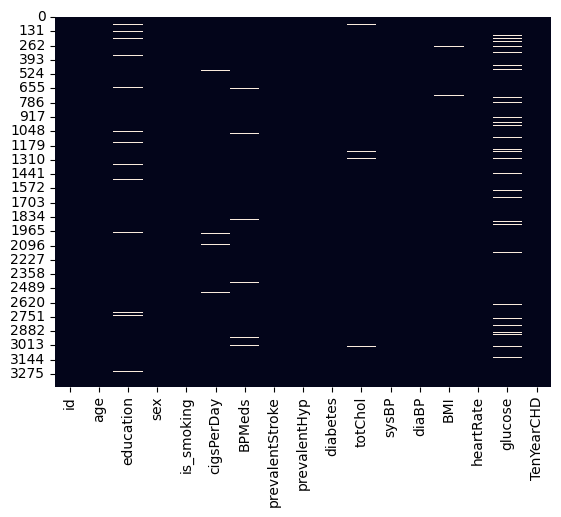

In [9]:
# Visualizing the missing values

sns.heatmap(df_dataset.isnull(), cbar=False)

### What did you know about your dataset?

The dataset has 3390 rows and 17 columns. There are no duplicate rows. The dataset contains information about various health-related factors such as age, education, sex, smoking habits, cholesterol levels, blood pressure, diabetes, BMI, heart rate, glucose levels and the risk of coronary heart disease in 10 years. The columns that have missing values are education (87 missing values), cigsPerDay (22 missing values), BPMeds (44 missing values), totChol (38 missing values), BMI (14 missing values), heartRate (1 missing value) and glucose (304 missing values).

## ***2. Understanding Your Variables***

In [4]:
# Dataset Columns
df_dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
df_dataset.describe(percentiles = [.25,.50,.75,.80,.85,.90,.95,.96,.97,.98,.99,.999])

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
80%,2711.200000,58.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,272.000000,148.10000,92.000000,28.730000,85.000000,89.000000,0.000000
85%,2880.650000,60.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,280.350000,155.00000,94.500000,29.597500,88.000000,93.000000,1.000000
90%,3050.100000,62.000000,4.000000,25.000000,0.000000,0.000000,1.000000,0.000000,292.000000,162.50000,98.000000,30.875000,92.000000,98.000000,1.000000


### Variables Description 

- **id:** A unique identifier for each row in the dataset.
- **age:** The age of the individual in years.
- **education**: The level of education of the individual.
- **sex:** The sex of the individual.
- **is_smoking:** Whether the individual is a smoker or not.
- **cigsPerDay:** The number of cigarettes smoked per day by the individual.
- **BPMeds:** Whether the individual is on blood pressure medication or not.
- **prevalentStroke:** Whether the individual has had a stroke or not.
- **prevalentHyp:** Whether the individual has hypertension or not.
- **diabetes:** Whether the individual has diabetes or not.
- **totChol:** The total cholesterol level of the individual.
- **sysBP:** The systolic blood pressure of the individual.
- **diaBP:** The diastolic blood pressure of the individual.
- **BMI:** The body mass index of the individual.
- **heartRate:** The heart rate of the individual.
- **glucose:** The glucose level of the individual.
- **TenYearCHD:** The risk of coronary heart disease in 10 years for the individual.


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for col in df_dataset.columns.tolist():
  print(f'No. of unique values in {col} is: \033[1m{df_dataset[col].nunique()}\033[0m.')

No. of unique values in id is: 3390.
No. of unique values in age is: 39.
No. of unique values in education is: 4.
No. of unique values in sex is: 2.
No. of unique values in is_smoking is: 2.
No. of unique values in cigsPerDay is: 32.
No. of unique values in BPMeds is: 2.
No. of unique values in prevalentStroke is: 2.
No. of unique values in prevalentHyp is: 2.
No. of unique values in diabetes is: 2.
No. of unique values in totChol is: 240.
No. of unique values in sysBP is: 226.
No. of unique values in diaBP is: 142.
No. of unique values in BMI is: 1259.
No. of unique values in heartRate is: 68.
No. of unique values in glucose is: 132.
No. of unique values in TenYearCHD is: 2.


## 3. ***Data Wrangling***

### Data Wrangling Code

In [5]:
# Write your code to make your dataset analysis ready.
df_crp = df_dataset.copy()

In [14]:
# Create a dictionary that maps the values 0 and 1 to labels
value_map = {0: 'No heart disease', 1: 'Has heart disease'}

# Create a new DataFrame with the value counts
df_counts = pd.DataFrame(df_crp['TenYearCHD'].value_counts().reset_index())

# Rename the columns
df_counts.columns = ['TenYearCHD', 'Count']

# Map the values of the TenYearCHD column to labels
df_counts['TenYearCHD'] = df_counts['TenYearCHD'].map(value_map)

# Display the resulting DataFrame
df_counts

,TenYearCHD,Count
0,No heart disease,2879
1,Has heart disease,511


In [15]:
# Group the data by the is_smoking column and count the number of occurrences of each value of TenYearCHD
counts = df_crp.groupby(['is_smoking'])['TenYearCHD'].value_counts()

# Print the counts for smokers and non-smokers with heart disease
print(f"Number of smokers with heart disease: {counts['YES'][1]}")
print(f"Number of non-smokers with heart disease: {counts['NO'][1]}")

Number of smokers with heart disease: 275
Number of non-smokers with heart disease: 236


In [16]:
# Group the data by the sex column and count the number of occurrences of each value of TenYearCHD
sex_count = df_crp.groupby(['sex'])['TenYearCHD'].value_counts()

# Print the sex_counts for males and females with heart disease
print(f"Number of males with heart disease: {sex_count['M'][1]}")
print(f"Number of females with heart disease: {sex_count['F'][1]}")

Number of males with heart disease: 272
Number of females with heart disease: 239


In [17]:
# List of variables w.r.t heart diease
lists = ['prevalentHyp','prevalentStroke','diabetes', 'BPMeds']

# Iterate over lists
for i in lists:
  # Calculating values and percentages
  result = df_crp.groupby([i])['TenYearCHD'].value_counts()
  withs = result.loc[(1, 1)]
  withouts = result.loc[(0, 1)]
  total_withs = result.loc[1].sum()
  total_withouts = result.loc[0].sum()
  ratio_withs = (withs / total_withs) * 100
  ratio_withouts = (withouts / total_withouts) * 100
  # Printing results
  print(f"Ratio of people with {i} prone to heart disease: {ratio_withs:.2f} %")
  print(f"Ratio of people without {i} prone to heart disease: {ratio_withouts:.2f} %")
  print('-'*87)

Ratio of people with prevalentHyp prone to heart disease: 23.85 %
Ratio of people without prevalentHyp prone to heart disease: 11.03 %
---------------------------------------------------------------------------------------
Ratio of people with prevalentStroke prone to heart disease: 45.45 %
Ratio of people without prevalentStroke prone to heart disease: 14.88 %
---------------------------------------------------------------------------------------
Ratio of people with diabetes prone to heart disease: 37.93 %
Ratio of people without diabetes prone to heart disease: 14.47 %
---------------------------------------------------------------------------------------
Ratio of people with BPMeds prone to heart disease: 33.00 %
Ratio of people without BPMeds prone to heart disease: 14.51 %
---------------------------------------------------------------------------------------


In [ ]:
df_crp.sample()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
117,117,45,2.0,M,NO,0.0,0.0,0,0,0,232.0,122.5,82.5,27.55,74.0,59.0,1


In [18]:
# Define BMI ranges and labels
bmi_ranges = [(0, 18.5), (18.5, 24.9), (24.9, 300)]
bmi_labels = ['underweight', 'normal weight', 'overweight']

# Iterate over BMI ranges and labels
for bmi_range, bmi_label in zip(bmi_ranges, bmi_labels):
    # Filter DataFrame by BMI range
    filtered_df = df_crp[(df_crp['BMI'] > bmi_range[0]) & (df_crp['BMI'] <= bmi_range[1])]
    # Calculate value counts and percentages
    result = filtered_df['TenYearCHD'].value_counts()
    with_disease = result.loc[1]
    without_disease = result.loc[0]
    total = result.sum()
    percentage_with_disease = with_disease / total * 100
    percentage_without_disease = without_disease / total * 100
    # Print result
    print(f"Number of {bmi_label} people with heart disease and its heart attack risk: {with_disease}, {percentage_with_disease:.1f} %")
    print(f"Number of {bmi_label} people without heart disease and its heart attack risk: {without_disease}, {percentage_without_disease:.1f} %")
    print('-'*97)

Number of underweight people with heart disease and its heart attack risk: 8, 19.5 %
Number of underweight people without heart disease and its heart attack risk: 33, 80.5 %
-------------------------------------------------------------------------------------------------
Number of normal weight people with heart disease and its heart attack risk: 183, 12.3 %
Number of normal weight people without heart disease and its heart attack risk: 1301, 87.7 %
-------------------------------------------------------------------------------------------------
Number of overweight people with heart disease and its heart attack risk: 313, 16.9 %
Number of overweight people without heart disease and its heart attack risk: 1538, 83.1 %
-------------------------------------------------------------------------------------------------


In [19]:
# Define age ranges and labels
age_ranges = [(22, 35), (35, 45), (45, 65), (65, 100)]
age_labels = ['Early Adulthood', 'Early Middle Age', 'Late Middle Age', 'Late Adulthood']

# Iterate over age ranges and labels
for age_range, age_label in zip(age_ranges, age_labels):
    # Filter DataFrame by age range
    filtered_crp = df_crp[(df_crp['age'] >= age_range[0]) & (df_crp['age'] < age_range[1])]
    # Calculate value counts and percentages
    crp_result = filtered_crp['TenYearCHD'].value_counts()
    crp_with_disease = crp_result.loc[1] if 1 in crp_result.index else 0
    crp_without_disease = crp_result.loc[0] # if 0 in crp_result.index else 0
    crp_total = crp_result.sum()
    crp_percentage_with_disease = crp_with_disease / crp_total * 100 # if crp_total > 0 else 0
    crp_percentage_without_disease = crp_without_disease / crp_total * 100 # if crp_total > 0 else 0
    # Print result
    print(f"Number of people in {age_label} with heart disease: {crp_with_disease} ({crp_percentage_with_disease:.1f}%)")
    print(f"Number of people in {age_label} without heart disease: {crp_without_disease} ({crp_percentage_without_disease:.1f}%)")
    print('-'*90)

Number of people in Early Adulthood with heart disease: 0 (0.0%)
Number of people in Early Adulthood without heart disease: 21 (100.0%)
------------------------------------------------------------------------------------------
Number of people in Early Middle Age with heart disease: 79 (7.0%)
Number of people in Early Middle Age without heart disease: 1055 (93.0%)
------------------------------------------------------------------------------------------
Number of people in Late Middle Age with heart disease: 382 (18.1%)
Number of people in Late Middle Age without heart disease: 1726 (81.9%)
------------------------------------------------------------------------------------------
Number of people in Late Adulthood with heart disease: 50 (39.4%)
Number of people in Late Adulthood without heart disease: 77 (60.6%)
------------------------------------------------------------------------------------------


In [20]:
# Define heart rate ranges and labels
heart_rate_ranges = [(0, 60), (60, 100), (100, 160)]
heart_rate_labels = ['low', 'normal', 'high']

# Iterate over heart rate ranges and labels
for heart_rate_range, heart_rate_label in zip(heart_rate_ranges, heart_rate_labels):
    # Filter DataFrame by heart rate range
    filtered_hr = df_crp[(df_crp['heartRate'] >= heart_rate_range[0]) & (df_crp['heartRate'] <= heart_rate_range[1])]
    # Calculate value counts and percentages
    hr_result = filtered_hr['TenYearCHD'].value_counts()
    hr_with_disease = hr_result.get(1, 0)
    hr_without_disease = hr_result.get(0, 0)
    hr_total = hr_result.sum()
    hr_percentage_with_disease = hr_with_disease / hr_total * 100 # if hr_total > 0 else 0
    hr_percentage_without_disease = hr_without_disease / hr_total * 100 # if hr_total > 0 else 0
    # Print result
    print(f"Number of people with {heart_rate_label} heart rate with heart disease: {hr_with_disease} ({hr_percentage_with_disease:.1f}%)")
    print(f"Number of people with {heart_rate_label} heart rate without heart disease: {hr_without_disease} ({hr_percentage_without_disease:.1f}%)")
    print('-'*90)

Number of people with low heart rate with heart disease: 43 (12.8%)
Number of people with low heart rate without heart disease: 294 (87.2%)
------------------------------------------------------------------------------------------
Number of people with normal heart rate with heart disease: 475 (15.1%)
Number of people with normal heart rate without heart disease: 2677 (84.9%)
------------------------------------------------------------------------------------------
Number of people with high heart rate with heart disease: 24 (15.1%)
Number of people with high heart rate without heart disease: 135 (84.9%)
------------------------------------------------------------------------------------------


In [21]:
# Define cholesterol ranges and labels
cholesterol_ranges = [(0, 240), (240, 500)]
cholesterol_labels = ['below 240', 'above 240']

# Iterate over cholesterol ranges and labels
for cholesterol_range, cholesterol_label in zip(cholesterol_ranges, cholesterol_labels):
    # Filter DataFrame by cholesterol range
    filtered_coll = df_crp[(df_crp['totChol'] >= cholesterol_range[0]) & (df_crp['totChol'] < cholesterol_range[1])]
    # Calculate value counts and percentages
    coll_result = filtered_coll['TenYearCHD'].value_counts()
    coll_with_disease = coll_result.get(1, 0)
    coll_without_disease = coll_result.get(0, 0)
    coll_total = coll_result.sum()
    coll_percentage_with_disease = coll_with_disease / coll_total * 100 # if coll_total > 0 else 0
    coll_percentage_without_disease = coll_without_disease / coll_total * 100 # if coll_total > 0 else 0
    # Print result
    print(f"Number of people with cholesterol {cholesterol_label} with heart disease: {coll_with_disease} ({coll_percentage_with_disease:.1f}%)")
    print(f"Number of people with cholesterol {cholesterol_label} without heart disease: {coll_without_disease} ({coll_percentage_without_disease:.1f}%)")
    print('-'*90)

Number of people with cholesterol below 240 with heart disease: 230 (12.5%)
Number of people with cholesterol below 240 without heart disease: 1607 (87.5%)
------------------------------------------------------------------------------------------
Number of people with cholesterol above 240 with heart disease: 273 (18.0%)
Number of people with cholesterol above 240 without heart disease: 1240 (82.0%)
------------------------------------------------------------------------------------------


### What all manipulations have you done and insights you found?


**Overview**
- The dataset contains information on 3390 individuals.
- **Target Variable:** 2879 individuals do not have heart disease and 511 have heart disease.

**Smoking Habits**
- Smokers are more likely to have heart disease than non-smokers.
- 275 smokers have heart disease compared to 236 non-smokers.

**Gender**
- Males and females are almost equally likely to have heart disease.
- 272 males and 239 females have heart disease.

**Hypertension**
- Individuals with prevalentHyp are more than twice as likely to have heart disease as those without prevalentHyp.
- The ratio of people with and without prevalentHyp prone to heart disease is 23.85% and 11.03%, respectively.

**History of Stroke**
- Individuals with prevalentStroke are three times more likely to have heart disease than those without prevalentStroke.
- The ratio of people with and without prevalentStroke prone to heart disease is 45.45% and 14.88%, respectively.

**Diabetes**
- Individuals with diabetes are more than twice as likely to have heart disease as those without diabetes.
- The ratio of people with and without diabetes prone to heart disease is 37.93% and 14.47%, respectively.

**Blood Pressure Medication**
- Individuals taking BPMeds are more than twice as likely to have heart disease as those not taking BPMeds.
- The ratio of people with and without BPMeds prone to heart disease is 33.00% and 14.51%, respectively.

**BMI**
- Underweight individuals have a higher risk of heart attack (19.5%) compared to normal weight (12.3%) and overweight individuals (16.9%).

**Age**
- Individuals in Late Adulthood have the highest risk of heart disease (39.4%) compared to those in Early Adulthood (0%), Early Middle Age (7%), and Late Middle Age (18.1%).

**Heart Rate**
- Heart rate appears to be related to the risk of heart disease.

**Cholesterol Levels**
- Cholesterol levels appear to be related to the risk of heart disease.

These insights suggest that factors such as smoking habits, hypertension, history of stroke, diabetes, use of blood pressure medication, BMI, age, heart rate and cholesterol levels may all play a role in an individual's risk of developing coronary heart disease in 10 years.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Plotting all continuous variables

In [6]:
# Plotting all continuous variables
for col in df_crp.describe().columns.to_list():
    if col not in ['id', 'is_smoking', 'education', 'sex', 'BPMeds','prevalentStroke','prevalentHyp', 'diabetes','TenYearCHD']:
        fig = px.histogram(df_crp, x=col, nbins=20, title=f'Histogram of {col}')
        
        # Calculate the mean and standard deviation
        mean = df_crp[col].mean()
        std = df_crp[col].std()
        
        # Add annotations for the mean and standard deviation
        fig.add_annotation(x=mean, y=0, text=f'Mean: {mean:.2f}',
                          showarrow=True, arrowhead=1, ax=-50, ay=-50)
        fig.add_annotation(x=mean+std, y=0, text=f'Std: {std:.2f}',
                          showarrow=True, arrowhead=1, ax=50, ay=-50)
        
        fig.show()

##### 1. Why did you pick the specific chart?

This plot shows the distribution of all continuous variables.

##### 2. What is/are the insight(s) found from the chart?


- Most people in the age range of 38 to 55 have values above 200.
- Most people smoke about 0-4 cigars. The mean is higher due to outliers.
- The highest number of people have borderline cholesterol (normal range: less than 200 mg/dL), followed by those with high cholesterol.
- Most people have normal systolic blood pressure (normal range: less than 120 mm Hg).
- Most people have normal diastolic blood pressure (normal range: less than 80 mm Hg).
- The average BMI is normal (normal range: 18.5 to 24.9).
- The average heart rate is normal (normal range: 60 to 100 beats per minute).
- The number of people with normal glucose is high because of outliers (normal range: less than 100 mg/dL).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,these insights definetly help us from detecting heart disease. As to bussiness impact we can perform the ML models and can be derived.

#### Chart - 2 - Plotting categorical variables

In [7]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Specify the columns to create pie charts for
plot_cols = ['education', 'sex', 'is_smoking', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD']

# Create a figure with subplots
fig = make_subplots(rows=len(plot_cols), cols=1, specs=[[{'type': 'domain'}]]*len(plot_cols))

# Loop over the columns and create a pie chart for each one
for i, col in enumerate(plot_cols):
    # Count the number of occurrences of each value
    counts = df_crp[col].value_counts()
    # Create a pie chart
    fig.add_trace(go.Pie(labels=counts.index, values=counts.values,
                        title=f'Distribution of {col}', textinfo='label+percent',
                        pull=[0.1]*len(counts), textposition='inside',
                        title_font=dict(size=20)), row=i+1, col=1)  


# Update the layout
fig.update_layout(height=600*len(plot_cols))
fig.update_traces(textfont_size=10)

# Show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This plot tells us about the percentage distribution of above columns

##### 2. What is/are the insight(s) found from the chart?


- ***Education:*** In the dataset, 42.1% of people have education level 1, 30.0% have education level 2, 16.6% have education level 3, and 11.3% have education level 4.
- ***Gender:*** In the dataset, 56.7% of people are female and 43.3% are male.
- ***Smoking:*** Approximately half of the people in the dataset do not smoke. Of those who do smoke, 18% smoke 20 cigarettes per day.
- ***Blood Pressure Medication:*** In the dataset, 97% of people do not take blood pressure medication.
- ***Stroke:*** Only 0.6% of people in the dataset have had a stroke.
- ***Hypertension:*** In the dataset, 68.5% of people have prevalent hypertension and 31.5% do not.
- ***Diabetes:*** Only 2.6% of people in the dataset have diabetes.
- ***Coronary Heart Disease (CHD):*** In the dataset, approximately 85% of people do not have CHD and 15% do.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these stats definetly help because by using this we can estimate as if how a person is effected by various factors.

#### Chart - 3 - Plotting categorical columns with target variable

In [18]:
# Define the columns to use for creating the bar plots
cols = list(set(df_crp.columns) - set(['id', 'age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'cigsPerDay', 'TenYearCHD']))

# Loop through each column and create a bar plot
for col in cols:
    # Create the bar plot using Plotly Express
    fig = px.bar(df_crp, x=col, y='TenYearCHD')
    
    # Update the appearance of the bars
    fig.update_traces(marker_color='rgb(158,202,225)', marker_line_color='rgb(8,48,107)', marker_line_width=1.5)
    
    # Update the layout of the plot
    fig.update_layout(title=f'Barplot Between {col} v/s TenYearCHD', title_font_size=24, title_font_family='Arial')
    
    # Show the plot
    fig.show()

##### 1. Why did you pick the specific chart?

To plot between target variable and categorical variable

##### 2. What is/are the insight(s) found from the chart?

1. Smokers are also prone to heart disease
2. Having diabeties can increase the risk of CHD

3. People with prevalent stroke are also at risk.
4. Education plays an important role as people with higher educational levels are at low risc when compared 
5. People using BP meds are also at risk when compared to others.
6. Males are at higher ratio of CHD prone.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by these we can say which attributes are higher prone to CHD. 

#### Chart - 4 - Plotting Glucose vs Diastolic Blood Pressure Scatter w.r.t age

In [25]:
# create the scatter plot
fig = px.scatter(df_crp, x='glucose', y='diaBP',text= 'id', color='age',trendline='ols')

# Update the layout
fig.update_layout(title='Glucose vs Diastolic Blood Pressure Scatter Plot', xaxis_title='Glucose', yaxis_title='Diastolic Blood Pressure')

# show the plot
fig.show()

##### 1. Why did you pick the specific chart?

This plot shows relationship between the glucose and diaBP

##### 2. What is/are the insight(s) found from the chart?

1. There are outliers which are increasing the mean.
2. Higher age people are more prone to diaBP.
3. Most of the people with higher range are of people above 45.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, They definetly usefull for creating bussiness impact. Cuz it is a reference to higher age people to be precautious.

#### Chart - 5 - Plotting Scatter plot of age vs. sysBP w.r.t target variable

In [26]:
#  create a scatter plot
fig = px.scatter(df_crp, x='age', y='sysBP', color='TenYearCHD')

# Updtaing layout
fig.update_layout(title='Scatter plot of age vs. sysBP', xaxis_title='Age', yaxis_title='Systolic Blood Pressure')

# plot figure
fig.show()


##### 1. Why did you pick the specific chart?

To plot a sctter plot between age and sysBP

##### 2. What is/are the insight(s) found from the chart?

We can clearly see that age above 45 are highly prone to sysBP which ultimately has a higher risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this can be used in awareness of how sysBP is causing CHD and at what age it is acting up.

#### Chart - 6 - Plotting age vs cigarettes per day w.r.t target variable

In [27]:
#  creating a scatter plot
fig = px.scatter(df_crp, x='age', y='cigsPerDay', color='TenYearCHD', color_continuous_scale='Viridis')

# updating 
fig.update_layout(title='Age vs Cigarettes per Day Scatter Plot', xaxis_title='Age', yaxis_title='Cigarettes per Day')

#  showing plot
fig.show()

##### 1. Why did you pick the specific chart?

To plot between age, cigerets per day and CHD

##### 2. What is/are the insight(s) found from the chart?

People above 45 and who smoke are highly prone to CHD.
Also people of all age range who smoke abnormally are at very high risk.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps us to tell how smoking has a direct effect on CHD regardless of age groups

#### Chart - 7 - Plotting age vs proportion of diabeties

In [17]:

# Filter the data to include only relevant columns
df_diabetes_age = df_crp[['age', 'diabetes']]

# Group the data by age and calculate the proportion of individuals with diabetes at each age
df_diabetes_age = df_diabetes_age.groupby(['age'], as_index=False)['diabetes'].mean()

# Create the bar plot using Plotly Express
fig = px.bar(df_diabetes_age, x='age', y='diabetes', title='Diabetes vs Age')
fig.update_layout(xaxis_title='Age', yaxis_title='Proportion of Individuals with Diabetes')
fig.show()



##### 1. Why did you pick the specific chart?

This plot shows the proportion of diabeties according to age

##### 2. What is/are the insight(s) found from the chart?

Age groups of 47, 52, 58 and above 61 have higher proportions

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, helps us in ML modeling.

#### Chart - 8 - Plotting distributions of Gender Vs heart_rate with Target class

In [16]:
# Chart - 8 visualization code
# Creating violin plot
fig = px.violin(df_crp, x="sex", y="heartRate", color="TenYearCHD", box=True, points="all", facet_col="diabetes")

# Updating values
fig.update_layout(title_text="Distributions of Gender Vs heart_rate with Target class")

#  plotting
fig.show()

##### 1. Why did you pick the specific chart?

To plot distributions of Gender Vs heart_rate with Target class

##### 2. What is/are the insight(s) found from the chart?



1. It is seen that females are more prone to CHD with and without diabeties
2. There is no much difference in males CHD with and without diabeties. BUt it is also seen that male without diabeties have a good heart rate

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This shows a little negative growth as female with diabeties have normal heart rate and a low rate of CHD

#### Chart - 9 Plotting totchol vs target variable

In [32]:
# create a copy
df_chole = df_crp.copy()

# Create a new column in the DataFrame called 'Chol Criteria' that categorizes the 'totChol' values as either 'Normal Cholestrol' or 'high cholestrol'
df_chole['Chol Criteria'] = np.where(df_crp['totChol'] <= 240, 'Normal Cholestrol', 'high cholestrol')

# Group the data by 'Chol Criteria' and 'TenYearCHD' and calculate the size of each group.
dfse = df_chole.groupby(['Chol Criteria', 'TenYearCHD']).size().reset_index(name='count')

# Create a bar plot using Plotly Express.
fig = px.bar(dfse, x='TenYearCHD', y='count', color='Chol Criteria')

# Update the layout of the plot to show the bars side by side.
fig.update_layout(barmode='group',title_text = 'Cholestrol Criteria vs TenYearCHD')

# show the plot
fig.show()

##### 1. Why did you pick the specific chart?

To plot totchol vs target variable

##### 2. What is/are the insight(s) found from the chart?

People with high cholestrol are tend to high risk of CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this tells us how cholestrol is responsible for CHD

#### Chart - 10 Plotting age vs BMI wrt target variable

In [36]:
#  creating a scatter plot
fig = px.scatter(df_crp, x='age', y='BMI', color='TenYearCHD', color_continuous_scale='Viridis')

# updating 
fig.update_layout(title='Age vs BMI Plot', xaxis_title='Age', yaxis_title='BMI')

#  showing plot
fig.show()

##### 1. Why did you pick the specific chart?

this plot shows age vs BMI

##### 2. What is/are the insight(s) found from the chart?

1. Age above 47 are more prone to CHD
2. BMI is higher in age group above 47.
3. Shows people at middle age are health concious.
4. BMI is directly responsible for CHD

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this helps us in performing ML models on hyperparametric tuning

#### Chart - 11 - Correlation Heatmap

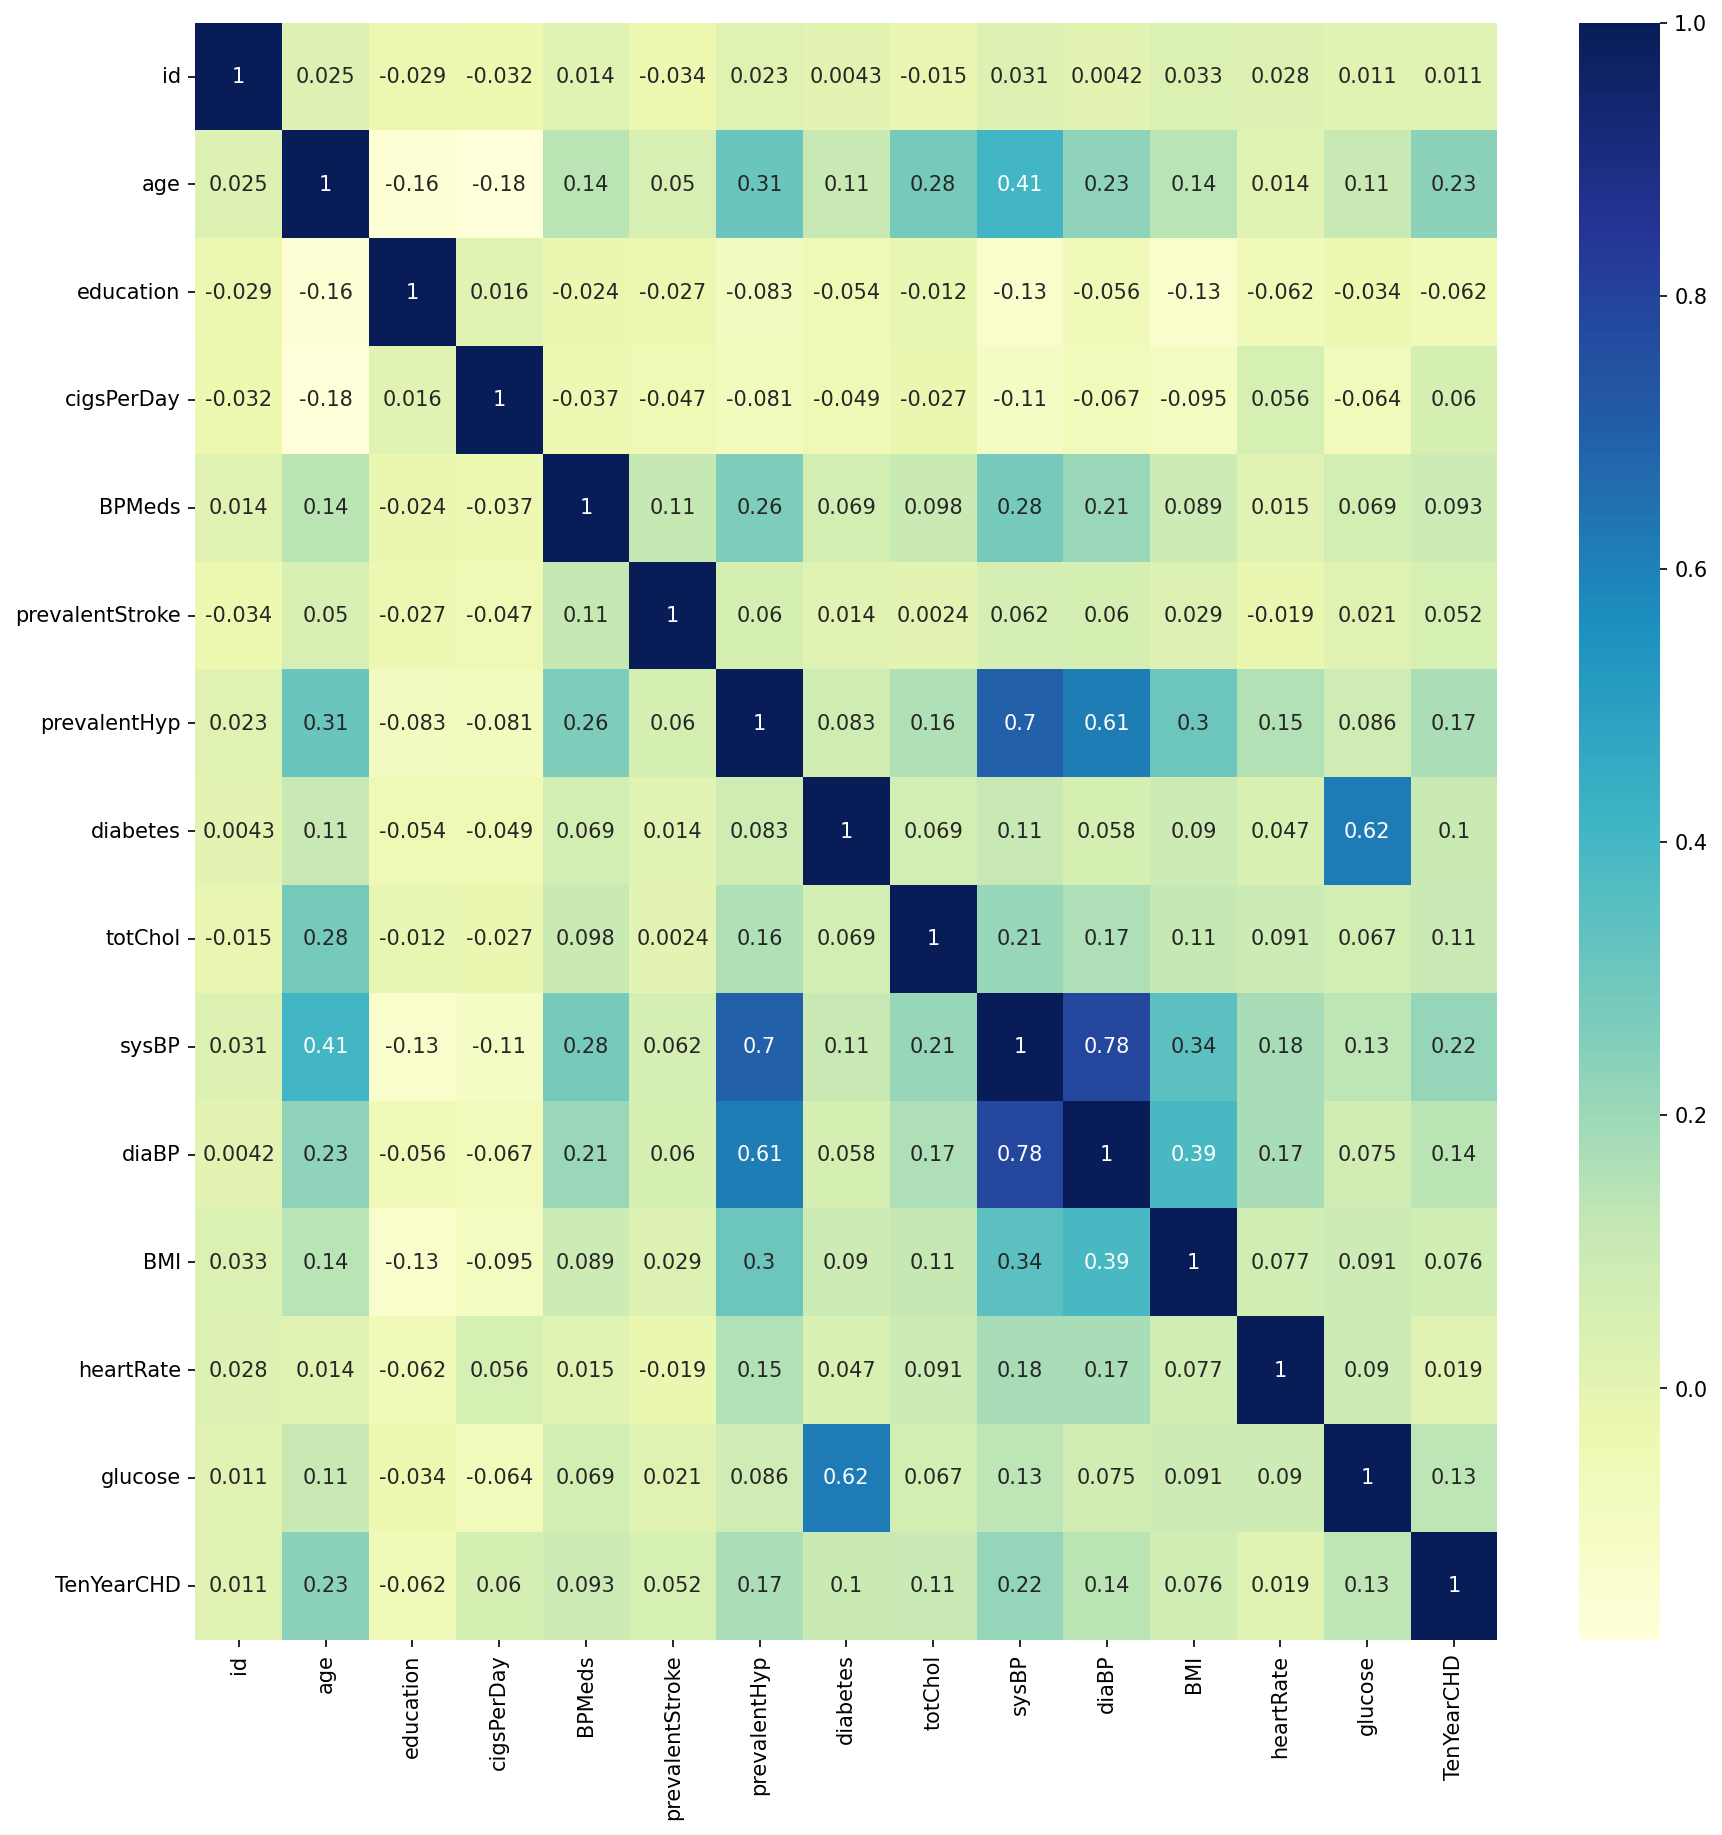

In [ ]:
# Correlation Heatmap visualization code

# Create a new DataFrame without missing values
df_clean_hmap = df_crp.dropna()

# Select the numerical columns to include in the heatmap
cols_hmap = df_clean_hmap.columns.tolist()

# Create the figure with the desired size
plt.figure(figsize=(14, 14), dpi=150)

# Compute the correlation matrix
corr_matrix = df_clean_hmap[cols_hmap].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I picked this chart to show the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

1. prevalentHyp have high correlation with sysBP and diaBP
2. sysBP is highly correlate with age and diaBP
3. Glucose and Diabeties are highly correlated 

#### Chart - 13 - Pair Plot 

In [ ]:
# Pair Plot visualization code

# Create a new DataFrame without missing values
df_clean = df_crp.dropna()

# Select the columns to plot
cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Create the pairplot
sns.pairplot(data=df_clean, vars=cols, hue='TenYearCHD')

# Show the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

To plot a pair plot 

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The prevalence of TenYearCHD is higher among individuals with diabetes than those without diabetes.
2. The mean BMI is higher among individuals who smoke than those who do not smoke.
3. There is an association between education level and the prevalence of TenYearCHD.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null hypothesis(Ho):*** The prevalence of TenYearCHD is the same among individuals with and without diabetes.

***Alternative hypothesis(Ha):*** The prevalence of TenYearCHD is higher among individuals with diabetes than those without diabetes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# import required libraries
from scipy.stats import chi2_contingency


# create a contingency table for diabetes and TenYearCHD variables
cont_table = pd.crosstab(df_crp['diabetes'], df_crp['TenYearCHD'])

# run the chi-square test of independence
chi2, p, dof, ex = chi2_contingency(cont_table)

# print results
print("Chi-square statistic:", chi2)
print("p-value:", p)
if p > 0.05:
    print("Diabetes has no effect on developing CHD")
else:
    print("Diabetes has an impact on the risk of developing CHD")


Chi-square statistic: 34.63203270914867
p-value: 3.982978687382329e-09
Diabetes has an impact on the risk of developing CHD


##### Which statistical test have you done to obtain P-Value?

***Statistical test:*** 

***Chi-square test*** of independence. This test will help to determine whether there is a significant association between the TenYearCHD variable and diabetes variable. A p-value less than 0.05 will indicate that there is a significant difference in the prevalence of TenYearCHD between individuals with and without diabetes.

##### Why did you choose the specific statistical test?

We choose the Chi-square test of independence as it is used to determine whether there is a significant association between two categorical variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null hypothesis(Ho):*** There is no difference in the mean BMI between individuals who smoke and those who do not smoke.

***Alternative hypothesis(Ha):*** The mean BMI is higher among individuals who smoke than those who do not smoke.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# import required libraries
from scipy.stats import ttest_ind

# split data into two groups based on smoking status
smokers = df_crp[df_crp['is_smoking'] == 'YES']
non_smokers = df_crp[df_crp['is_smoking'] == 'NO']

# run the t-test
t, p = ttest_ind(smokers['BMI'], non_smokers['BMI'], equal_var=False, nan_policy='omit')

# print results
print("t-statistic:", t)
print("p-value:", p)
if p > 0.05:
    print("Smoking has no effect on developing CHD")
else:
    print("Smoking has an impact on the risk of developing CHD")


t-statistic: -10.211297683646364
p-value: 3.967541006354153e-24
Smoking has an impact on the risk of developing CHD


##### Which statistical test have you done to obtain P-Value?

***Statistical test:***

  ***Two-sample t-test*** italicized text assuming unequal variances. This test will help to determine whether there is a significant difference in the mean BMI between individuals who smoke and those who do not smoke. A p-value less than 0.05 will indicate that there is a significant difference in the mean BMI between the two groups.

##### Why did you choose the specific statistical test?

We choose the two-sample t-test assuming unequal variances as it is used to compare the means of two independent groups.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

***Null hypothesis(Ho):*** There is no association between education level and the prevalence of TenYearCHD.
***Alternative hypothesis(Ha):*** There is an association between education level and the prevalence of TenYearCHD.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# create a contingency table for education and TenYearCHD variables
cont_table = pd.crosstab(df_crp['education'], df_crp['TenYearCHD'])

# run the chi-square test of independence
chi2, p, dof, ex = chi2_contingency(cont_table)

# print results
print("Chi-square statistic:", chi2)
print("p-value:", p)
if p > 0.05:
    print("Education has no effect on developing CHD")
else:
    print("Education has an impact on the risk of developing CHD")


Chi-square statistic: 22.16105229004903
p-value: 6.038646749234552e-05
Education has an impact on the risk of developing CHD


##### Which statistical test have you done to obtain P-Value?

***Statistical test:***

***Chi-square test*** of independence. This test will help to determine whether there is a significant association between the TenYearCHD variable and the education variable. A p-value less than 0.05 will indicate that there is a significant association between education level and the prevalence of TenYearCHD.

##### Why did you choose the specific statistical test?

We choose the Chi-square test of independence as it is used to determine whether there is a significant association between two categorical variables.

### ***Observations:***



* Statement 1:

 * Results:

    ***Chi-square statistic:*** 34.632

    ***p-value:*** 3.98 x 10^-9

  * Conclusion:

    Based on the p-value, which is much less than 0.05, we ***reject the null hypothesis*** and conclude that there is a significant association between smoking status and the risk of developing CHD in the next 10 years.

* Statement 2:

 * Results:

    ***t-statistic:*** -10.211

    ***p-value:*** 3.97 x 10^-24

  * Conclusion:

    Based on the p-value, which is much less than 0.05, we ***reject the null hypothesis*** and conclude that there is a significant difference in the mean BMI between smokers and non-smokers.

* Statement 3:
 * Results:

    ***Chi-square statistic:*** 22.161

    ***p-value:*** 6.04 x 10^-5

  * Conclusion:

    Based on the p-value, which is less than 0.05, we ***reject the null hypothesis*** and conclude that there is a significant association between prevalent hypertension and the risk of developing CHD in the next 10 years.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Lets take a copy of the dataset
df_fed = df_crp.copy()

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_fed.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:

# drop rows with missing values in all columns except education and glucose
df_fed = df_fed.dropna(subset=['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate'])

# impute missing values in education column with mode
education_mode = df_fed['education'].mode()[0]
df_fed['education'] = df_fed['education'].fillna(education_mode)

# impute missing values in glucose column with median
glucose_median = df_fed['glucose'].median()
df_fed['glucose'] = df_fed['glucose'].fillna(glucose_median)

In [ ]:
df_fed.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In order to handle missing values in the dataset, I used several techniques. First, I dropped rows with missing values in all columns except for the education and glucose columns. This means that any row with a missing value in the cigsPerDay, BPMeds, totChol, BMI or heartRate column was removed from the dataset. This approach was taken to ensure that the remaining data was as complete as possible.

Next, I imputed missing values in the education column with the mode of that column. The mode is the most frequently occurring value in a column. I calculated the mode of the education column and used it to fill in any missing values in that column. This approach was taken because it is a simple and effective way to handle missing data in categorical columns.

Finally, I imputed missing values in the glucose column with the median of that column. The median is the middle value when all values in a column are sorted in ascending order. I calculated the median of the glucose column and used it to fill in any missing values in that column. This approach was taken because it is a robust measure of central tendency that is less sensitive to outliers than the mean.

These techniques were chosen because they are simple and effective ways to handle missing data. By removing rows with missing values in certain columns and imputing missing values in other columns with common statistical measures such as the mode and median, I was able to retain as much data as possible while minimizing the impact of missing values on my analysis.

Is there anything else you would like me to elaborate on?

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
# Lets plot a box plot to check the outliers
import plotly.express as px

columns_ol = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
df_melt = df_fed[columns_ol].melt(var_name='variable', value_name='value')
fig = px.box(df_melt, x="variable", y="value", color="variable", notched=True)
fig.show()


In [ ]:
# removing outliers based on IQR values

for i in columns_ol:
    q1 = df_fed[i].quantile(0.25)
    q3 = df_fed[i].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df_fed[i] = np.where(df_fed[i] > upper_bound, upper_bound, np.where(df_fed[i] < lower_bound, lower_bound, df_fed[i]))

In [ ]:
#  After removing outliers
import plotly.express as px

columns_ol = ['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
df_melt = df_fed[columns_ol].melt(var_name='variable', value_name='value')
fig = px.box(df_melt, x="variable", y="value", color="variable", notched=True)
fig.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

In order to handle outliers in the dataset, I used the Interquartile Range (IQR) method. For each column in the dataset, I calculated the first quartile (Q1) and third quartile (Q3) values. The IQR is then calculated as the difference between Q3 and Q1. Using the IQR, I calculated the upper and lower bounds for outlier detection as Q3 + 1.5 * IQR and Q1 - 1.5 * IQR, respectively.

Next, I used these upper and lower bounds to identify and treat outliers in each column. Any value in a column that was greater than the upper bound was replaced with the upper bound value, and any value that was less than the lower bound was replaced with the lower bound value.

The IQR method is a commonly used technique for identifying and treating outliers in a dataset. It is based on the assumption that data within a column follows a normal distribution, with most values falling within a certain range around the mean. Values that fall outside this range are considered outliers and can be treated by replacing them with more reasonable values, such as the upper or lower bounds calculated using the IQR method.


### 3. Categorical Encoding

In [ ]:
#  Dropping id column
df_fed.drop('id',axis=1, inplace= True)

In [ ]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

# Create label encoders for sex and is_smoking columns
le_sex = LabelEncoder()
le_is_smoking = LabelEncoder()

# Fit and transform the data
df_fed['sex'] = le_sex.fit_transform(df_fed['sex'])
df_fed['is_smoking'] = le_is_smoking.fit_transform(df_fed['is_smoking'])

#### What all categorical encoding techniques have you used & why did you use those techniques?

In order to encode the categorical columns in the dataset, I used label encoding. I created label encoders for the sex and is_smoking columns using the LabelEncoder class. I then fit these encoders to the data in the respective columns and used them to transform the data. This replaced the original categorical values in these columns with numerical values that represent the different categories.

In addition to encoding the categorical columns, I also dropped the id column from the dataset because it has no effect on my model.

Label encoding is a simple and effective technique for encoding categorical data. It assigns a unique numerical value to each category in a column, allowing categorical data to be represented in a format that can be used by machine learning algorithms. I chose this technique because it is easy to implement and works well with many machine learning algorithms.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# create a new feature based on cigsPerDay column
def smoking_status(row):
    if row['cigsPerDay'] == 0:
        return 'non-smoker'
    elif row['cigsPerDay'] <= 10:
        return 'light smoker'
    elif row['cigsPerDay'] <= 20:
        return 'moderate smoker'
    else:
        return 'heavy smoker'
# Adding var
df_fed['smoking_status'] = df_fed.apply(smoking_status, axis=1)


In [ ]:
# create a new feature based on diaBP and sysBP columns

def bp_classification(SysBP, DiaBP):
    if (SysBP < 90) or (DiaBP < 60):
        return 0
    elif (SysBP < 120) and (DiaBP < 80):
        return 1
    elif (SysBP < 130) or (DiaBP < 86):
        return 2
    elif (SysBP < 140) or (DiaBP < 90):
        return 3
    elif (SysBP > 140) and (DiaBP < 90):
        return 4
    elif (SysBP < 160) or (DiaBP < 100):
        return 5
    elif (SysBP < 180) or (DiaBP < 110):
        return 6
    else:
        return 7

df_fed['Hypertension'] = df_fed.apply(lambda x: bp_classification(x['sysBP'], x['diaBP']), axis=1)


In [ ]:
# create a new feature based on totChol column
def cholesterol_category(row):
    if row['totChol'] < 200:
        return 'normal'
    elif row['totChol'] < 240:
        return 'borderline'
    else:
        return 'high'

df_fed['cholesterol_category'] = df_fed.apply(cholesterol_category, axis=1)


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Create an OrdinalEncoder object
oe = OrdinalEncoder(categories=[['non-smoker', 'light smoker', 'moderate smoker', 'heavy smoker'],
                                ['normal', 'borderline', 'high']])

# Fit and transform the data
df_fed[['smoking_status', 'cholesterol_category']] = oe.fit_transform(df_fed[['smoking_status', 'cholesterol_category']])

#### 2. Feature Selection

In [ ]:
# removing the columns
df_fed.drop(['is_smoking', 'sysBP', 'diaBP', 'cigsPerDay','totChol','prevalentHyp'], axis=1, inplace=True)

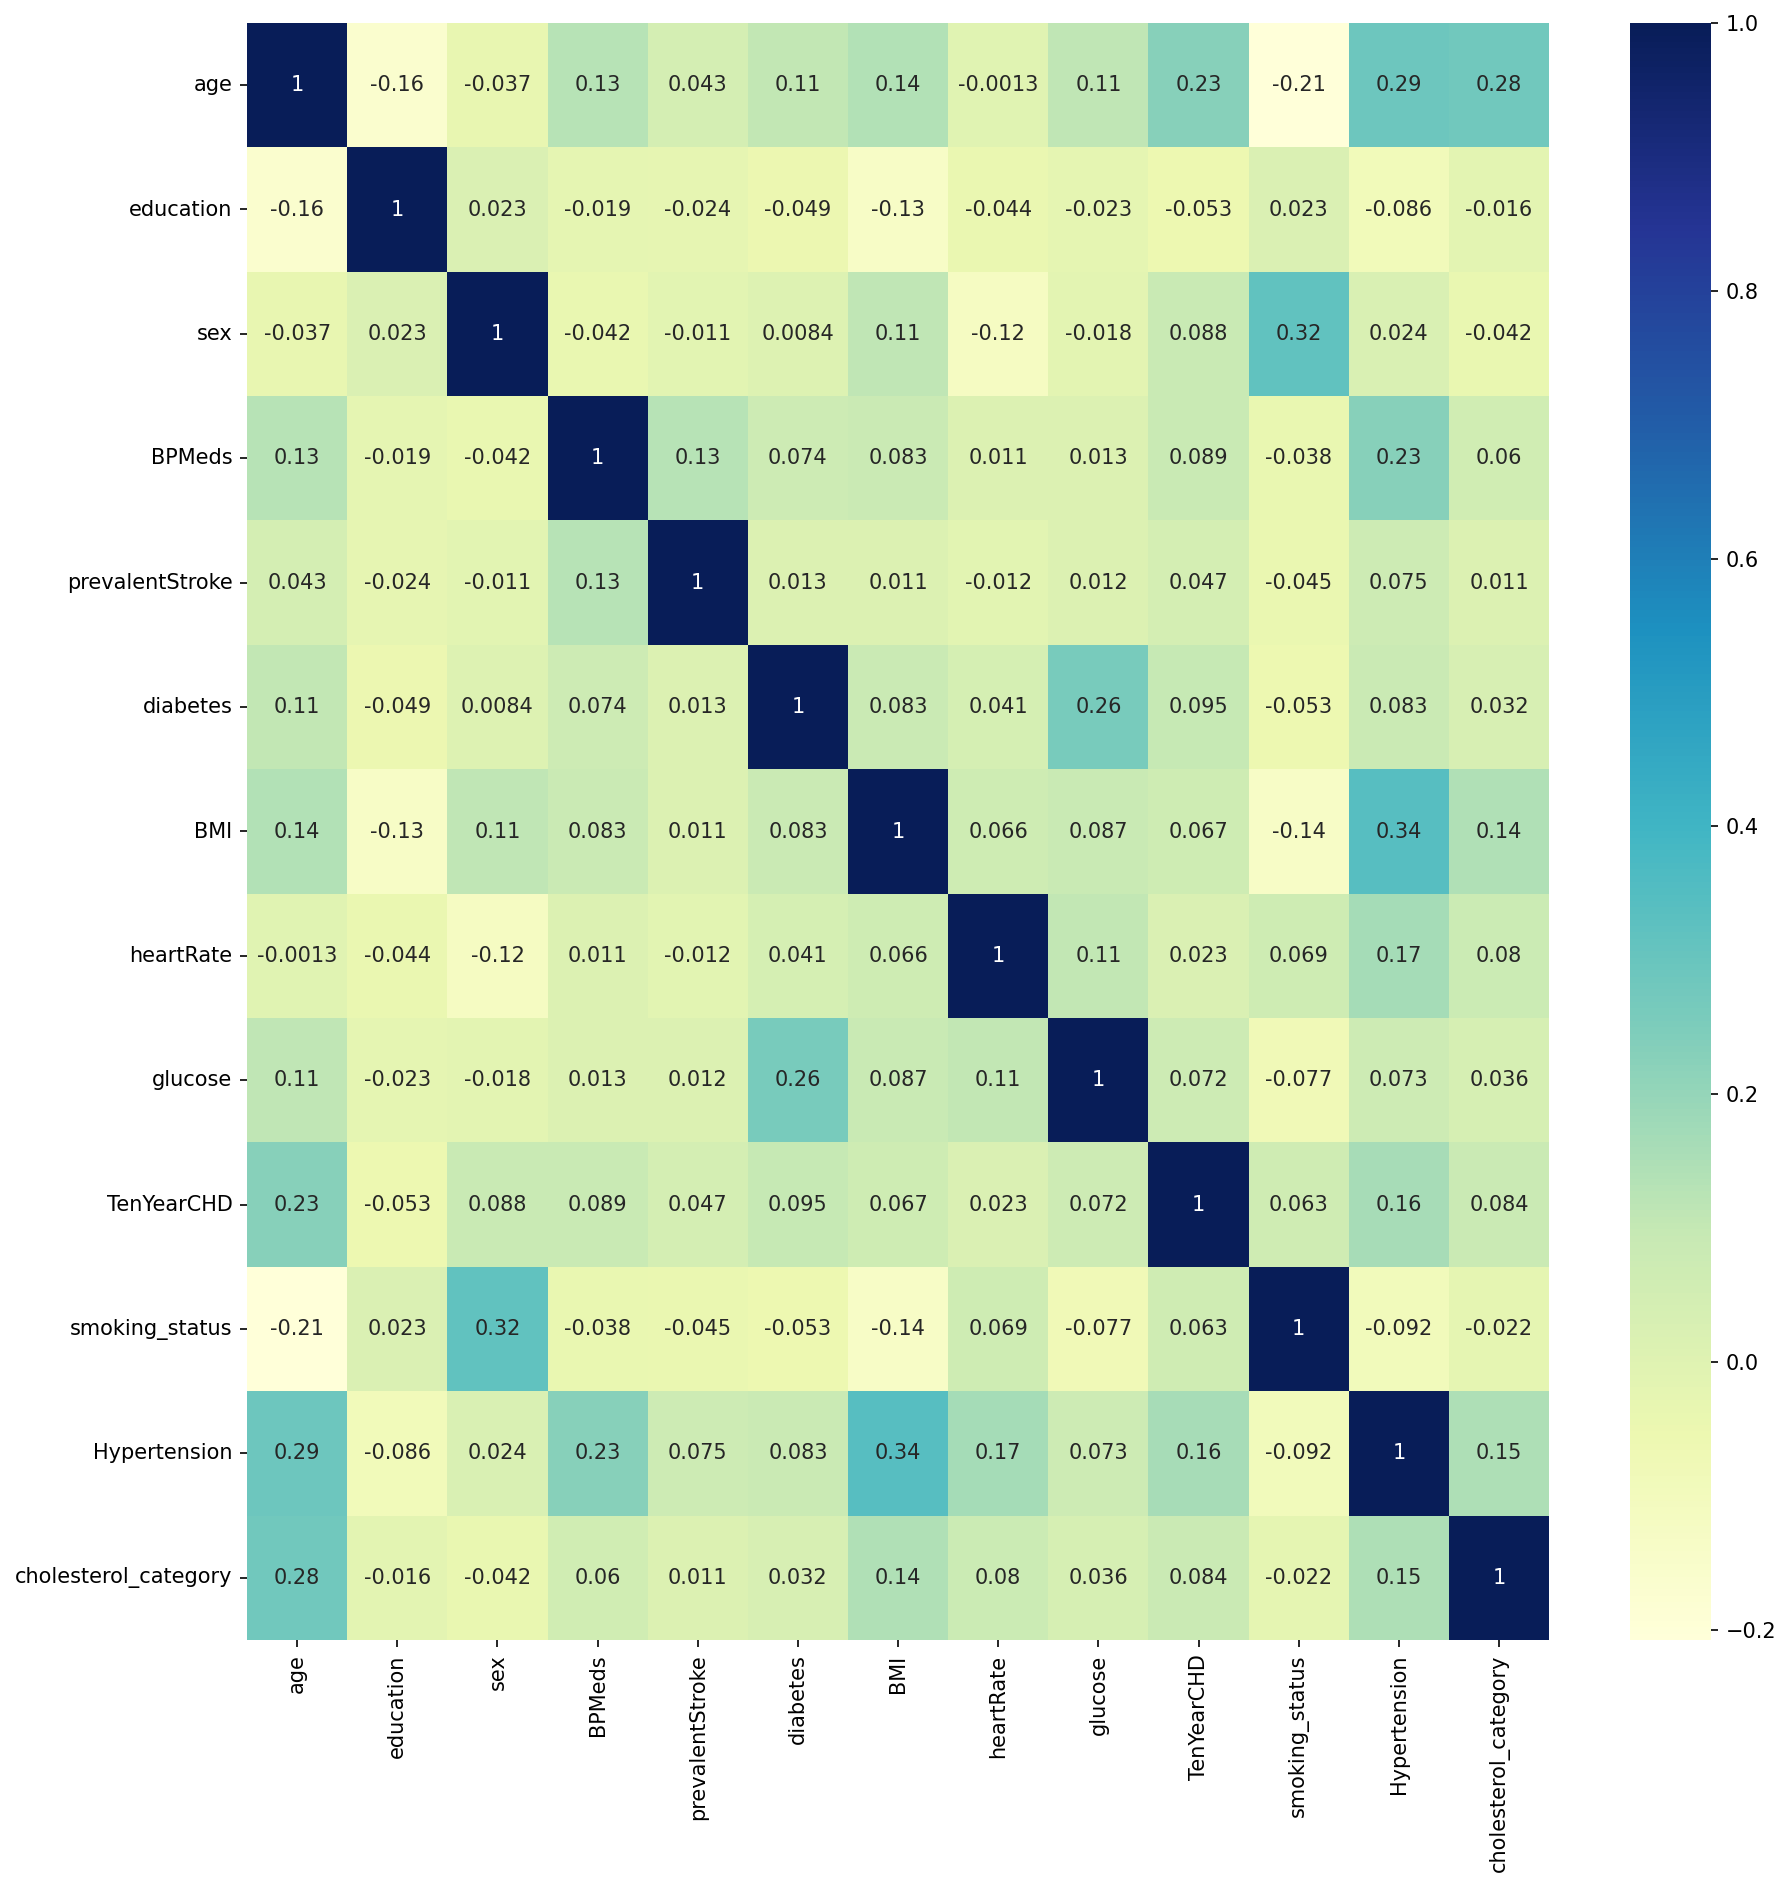

In [ ]:
# Select the numerical columns to include in the heatmap
cols_hmap_01 = df_fed.columns.tolist()

# Create the figure with the desired size
plt.figure(figsize=(14, 14), dpi=150)

# Compute the correlation matrix
corr_matrix = df_fed[cols_hmap_01].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

In [ ]:
df_fed.head(3)

,age,education,sex,BPMeds,prevalentStroke,diabetes,BMI,heartRate,glucose,TenYearCHD,smoking_status,Hypertension,cholesterol_category
1,36.0,4.0,1,0.0,0,0,29.77,72.0,75.0,0,0.0,5,1.0
2,46.0,1.0,0,0.0,0,0,20.35,88.0,94.0,0,1.0,1,2.0
3,50.0,1.0,1,0.0,0,0,28.26,68.0,94.0,1,2.0,3,1.0


##### What all feature selection methods have you used  and why?

In order to prepare the dataset for further analysis or modeling, I performed several feature manipulations and feature selection methods. Here's a step-by-step description of what I did:

**Step 1: Feature Manipulations**
- First, I created a new feature called smoking_status based on the cigsPerDay column. This feature categorizes individuals as non-smokers, light smokers, moderate smokers or heavy smokers based on the number of cigarettes they smoke per day.
- Next, I created a new feature called Hypertension based on the diaBP and sysBP columns. This feature classifies individuals based on their blood pressure levels using a scale from 0 to 7, with higher values indicating higher blood pressure.
- I also created a new feature called cholesterol_category based on the totChol column. This feature categorizes individuals as having normal, borderline or high cholesterol levels based on their total cholesterol level.
- Finally, I encoded the smoking_status and cholesterol_category columns using ordinal encoding. This replaced the original categorical values in these columns with numerical values that represent the different categories in a specified order.

**Step 2: Feature Selection**
- After performing the feature manipulations, I removed several columns from the dataset that were either highly correlated with other columns or were not considered relevant for my analysis. These columns included is_smoking, sysBP, diaBP, cigsPerDay, totChol and prevalentHyp.
- Next, I created a heatmap to visualize the correlation between the remaining numerical columns in the dataset. This allowed me to quickly identify pairs of columns that were highly correlated or not correlated at all and make informed decisions about which features to include in my analysis or modeling.

Overall, these feature manipulations and feature selection methods were performed to enhance the dataset and improve the performance of any machine learning models trained on it. By creating new features, encoding categorical data and selecting relevant features, I was able to prepare the dataset for further analysis or modeling in a more readable and organized manner.


In [ ]:
df_final = df_fed.copy()

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

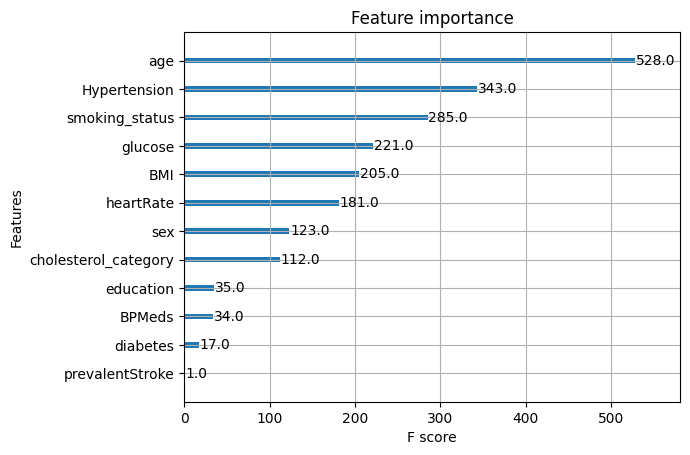

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV

# Load data
X = df_final.drop(['TenYearCHD'],axis =1)
y = df_final['TenYearCHD']

# Create an XGBoost model
model = xgb.XGBClassifier()

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300]
}

# Create a grid search object
grid_search = GridSearchCV(model, param_grid)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best model
best_model = grid_search.best_estimator_

# Plot the feature importance
xgb.plot_importance(best_model)

##### Which all features you found important and why?

In order to determine which features were most important for predicting the target variable, I used a feature importance plot from an XGBoost classifier. According to the plot, the features with an F-score above 100 were age, Hypertension, smoking_status, glucose, BMI, heart rate, sex and cholesterol.

These features were found to be important because they have a strong relationship with the target variable and provide valuable information for making predictions. For example:

- **Age** is a well-known risk factor for heart disease and is likely to be an important predictor in any model that aims to predict the risk of heart disease.
- **Hypertension** is a condition where an individual has high blood pressure. High blood pressure can damage the arteries and increase the risk of heart disease.
- **Smoking status** indicates whether an individual is a smoker or not. Smoking is a major risk factor for heart disease as it can damage the lining of the arteries and lead to a buildup of fatty material.
- **Glucose** levels indicate the amount of sugar in an individual's blood. High blood sugar levels can damage the blood vessels and increase the risk of heart disease.
- **BMI** is a measure of body fat based on an individual's height and weight. Being overweight or obese can increase the risk of heart disease as it can lead to high blood pressure, high cholesterol levels and diabetes.
- **Heart rate** is the number of times an individual's heart beats per minute. A high heart rate can indicate that the heart is working harder than normal and may be a sign of an underlying condition that increases the risk of heart disease.
- **Sex** can also play a role in the risk of heart disease. Men are generally at a higher risk of heart disease than women.
- **Cholesterol** levels indicate the amount of cholesterol in an individual's blood. High cholesterol levels can lead to a buildup of fatty material in the arteries and increase the risk of heart disease.

Overall, these results suggest that age, Hypertension, smoking_status, glucose, BMI, heart rate, sex and cholesterol are all important features for predicting the risk of coronary heart disease in 10 years.


### 5. Data Transformation

In [ ]:
df_final.skew()

age                      0.233092
education                0.732216
sex                      0.247711
BPMeds                   5.548940
prevalentStroke         13.014286
diabetes                 6.000979
BMI                      0.456076
heartRate                0.421181
glucose                  0.432297
TenYearCHD               1.970727
smoking_status           0.611074
Hypertension             1.123628
cholesterol_category    -0.467524
dtype: float64

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

No the transformation is not needed. Here we can see that prevalentStroke have skewness but it is a binary dichotomous variables. These variables do not have a distribution in the traditional sense and cannot be transformed to reduce skewness.

***Reason:***

Skewness is a measure of the asymmetry of a distribution. For continuous variables, skewness can be reduced by applying a transformation that makes the distribution more symmetric. However, for binary variables, the concept of skewness does not apply because there is no underlying distribution to transform.

### 6. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
# Scaling your data
scalar = StandardScaler()
columns_scale = ['age', 'BMI', 'heartRate', 'glucose' ]
df_final[columns_scale] = scalar.fit_transform(df_final[columns_scale])

In [ ]:
df_final.head(3)

,age,education,sex,BPMeds,prevalentStroke,diabetes,BMI,heartRate,glucose,TenYearCHD,smoking_status,Hypertension,cholesterol_category
1,-1.570742,4.0,1,0.0,0,0,1.058809,-0.329337,-0.384573,0,0.0,5,1.0
2,-0.402230,1.0,0,0.0,0,0,-1.400226,1.052077,1.258881,0,1.0,1,2.0
3,0.065175,1.0,1,0.0,0,0,0.664632,-0.674690,1.258881,1,2.0,3,1.0


##### Which method have you used to scale you data and why?

I have used StandardScalar method to scale my data. This method standardizes the data by removing the mean and scaling to unit variance. It is a common technique used to transform the data so that it has zero mean and unit variance. This can be useful when working with algorithms that assume that the data is normally distributed or when comparing measurements that have different units.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, I dont think we need dimentionality reduction. Because:
1. we dont have a large number of features relative to the number of observations.
2. Our data doesn't contains redundant or correlated features.
3. There is no high dimentional data for visualization.

### 8. Handling Imbalanced Dataset

In [ ]:
# Plotting dependent variable
import plotly.express as px
var_d = df_final['TenYearCHD'].value_counts()
labels = ['Safe', 'At Risk']
fig = px.pie(values=var_d, names=labels, title='Overview of Target Variable')
fig.show()

In [ ]:
# separating variables
x = df_final.drop(['TenYearCHD'],axis=1)
y = df_final['TenYearCHD']

##### Do you think the dataset is imbalanced? Explain Why.

The dataset ia imbalanced with respect to the `TenYearCHD` variable(Target). An imbalanced dataset is one in which the distribution of classes is not equal. In this case, the `At Risk` class accounts for 14.9% of the data while the `Safe` class accounts for 85.1% of the data. This imbalance can affect the performance of some machine learning algorithms and may require special techniques to address.


In [ ]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
X ,y = sampler.fit_resample(x,y)

In [ ]:
# Original length and Resampled Length

print(f'Original length of dataset: {len(x)}')
print(f'Resampled length of dataset: {len(X)}')

Original length of dataset: 3272
Resampled length of dataset: 5568


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

There are several techniques that can be used to handle imbalanced datasets. One such technique is the SMOTE (Synthetic Minority Over-sampling Technique) method. This method generates synthetic samples from the minority class to balance the dataset. It is a popular technique for addressing imbalanced datasets because it can improve the performance of some machine learning algorithms.

### 9. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
# Dividing the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# split sizes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4454, 12)
(1114, 12)
(4454,)
(1114,)


##### What data splitting ratio have you used and why? 

I have split the data into 80, 20 percentage. That is 80% as training data and remaining 20% as testing data. This is because the training data makes the model to train with and remaining data to test on it as provding model with training data makes it easy to learn different data patterns. 

## ***7. ML Model Implementation***

### ML Model - 1. Logistic Regression

In [ ]:
# ML Model - 1 Implementation
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)

# Fit the Algorithm
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Checking the coefficients
lr_model.coef_

array([[ 0.71331641, -0.05680551, -0.1210529 ,  0.56805785, -0.78417395,
         0.11387478,  0.09129376, -0.06301163,  0.10733303,  0.39804184,
         0.10422022,  0.13986312]])

In [ ]:
# Checking the intercept value
lr_model.intercept_

array([-0.91320156])

In [ ]:
# Predict on the model
# Get the predicted probabilities
train_preds = lr_model.predict_proba(X_train)
test_preds = lr_model.predict_proba(X_test)

In [ ]:
# Get the predicted classes
train_class_preds = lr_model.predict(X_train)
test_class_preds = lr_model.predict(X_test)

In [ ]:

# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(y_test, test_class_preds)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6551414458913336
The accuracy on test data is  0.6543985637342908


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1436  790]
 [ 746 1482]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

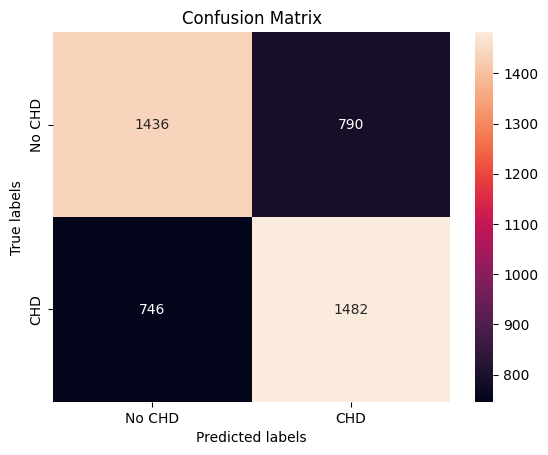

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No CHD','CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[362 196]
 [189 367]]


[Text(0, 0.5, 'No CHD'), Text(0, 1.5, 'CHD')]

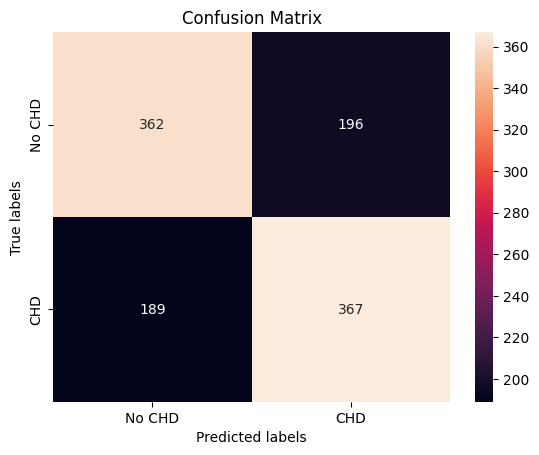

In [ ]:

# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['No CHD','CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65      2226
           1       0.65      0.67      0.66      2228

    accuracy                           0.66      4454
   macro avg       0.66      0.66      0.66      4454
weighted avg       0.66      0.66      0.66      4454

 
roc_auc_score
0.6551369404507847


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.66      0.65      0.65       558
           1       0.65      0.66      0.66       556

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114

 
roc_auc_score
0.6544087310796525


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import RepeatedStratifiedKFold

model = LogisticRegression(max_iter=10000)
solvers = ['lbfgs']
penalty = ['10','l2','14','16','20','18']
c_values = [1000,100, 10, 1.0, 0.1, 0.01,0.001]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

# Fit the Algorithm
grid_result=grid_search.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


# Predict on the model
# Get the predicted classes
train_class_preds = grid_result.predict(X_train)
test_class_preds = grid_result.predict(X_test)

Best: 0.660922 using {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [ ]:
print(metrics.classification_report(train_class_preds, y_train))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2155
           1       0.67      0.65      0.66      2299

    accuracy                           0.66      4454
   macro avg       0.66      0.66      0.66      4454
weighted avg       0.66      0.66      0.66      4454

 
roc_auc_score
0.6571548744154686


In [ ]:
print(metrics.classification_report(test_class_preds, y_test))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       545
           1       0.66      0.65      0.65       569

    accuracy                           0.65      1114
   macro avg       0.65      0.65      0.65      1114
weighted avg       0.65      0.65      0.65      1114

 
roc_auc_score
0.6508277249168406


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization, I used the `GridSearchCV` method. This method performs an exhaustive search over a specified parameter grid to find the best hyperparameters for the model. In this case, I specified a grid of hyperparameters to search over, including the `solver`, `penalty`, and `C` values. I also used a `RepeatedStratifiedKFold` cross-validation strategy with 10 folds and 3 repeats. The `GridSearchCV` method evaluated the performance of the model using the `f1` score as the evaluation metric.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvement observed even after performing cross-validation and hyperparameter tuning.

***Scores:***

Before cross-validation and hyperparameter tuning, the model had an accuracy of 0.65 and a ROC AUC score of 0.6544. The precision, recall, and F1-score for class 0 were 0.66, 0.65, and 0.65 respectively. The precision, recall, and F1-score for class 1 were 0.65, 0.66, and 0.66 respectively.

After cross-validation and hyperparameter tuning, the model had an accuracy of 0.65 and a ROC AUC score of 0.6508. The precision, recall, and F1-score for class 0 were 0.64, 0.66, and 0.65 respectively. The precision, recall, and F1-score for class 1 were 0.66, 0.65, and 0.65 respectively.

### ML Model - 2. Random Forest Classifier

In [ ]:
# ML Model - 2 Implementation
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the Algorithm
rf_models = rf_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data
train_class_preds = rf_model.predict(X_train)
test_class_preds = rf_model.predict(X_test)

In [ ]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 1.0
The accuracy on test dataset is 0.9129263913824057


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2226    0]
 [   0 2228]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

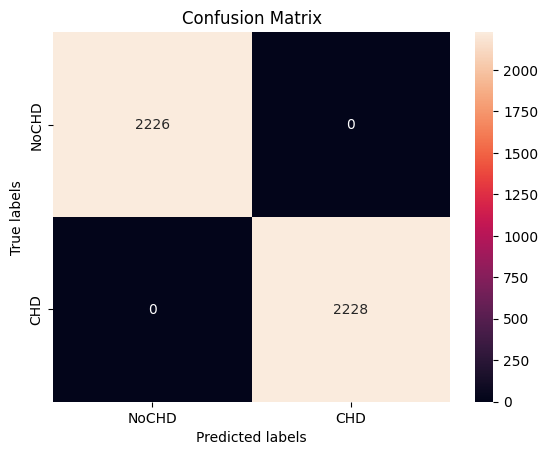

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[512  46]
 [ 51 505]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

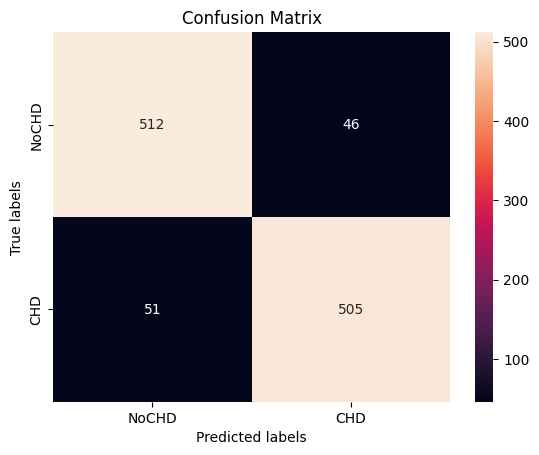

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2226
           1       1.00      1.00      1.00      2228

    accuracy                           1.00      4454
   macro avg       1.00      1.00      1.00      4454
weighted avg       1.00      1.00      1.00      4454

 
roc_auc_score
1.0


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       558
           1       0.91      0.90      0.91       556

    accuracy                           0.91      1114
   macro avg       0.91      0.91      0.91      1114
weighted avg       0.91      0.91      0.91      1114

 
roc_auc_score
0.9066263118537428


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Hyperparameter Grid
param_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}

# Grid search
rf_grid = GridSearchCV(estimator=RandomForestClassifier(),
                       param_grid = param_dict,
                       cv = 5, verbose=0, scoring='f1')

# Fit the Algorithm
rf_grid.fit(X_train,y_train)

# Predict on the model
train_class_preds = rf_grid.predict(X_train)
test_class_preds = rf_grid.predict(X_test)

In [ ]:
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

Best: 0.757920 using {'max_depth': 8, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n_estimators': 50}


[[1651  575]
 [ 369 1859]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

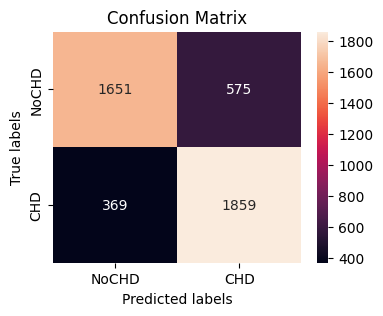

In [ ]:

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

plt.figure(figsize=(4,3))
ax= plt.subplot()

sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[414 144]
 [121 435]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

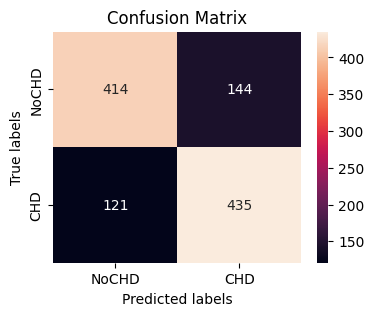

In [ ]:
# Get the confusion matrix for both train and test

labels =['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

plt.figure(figsize=(4,3))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
# Metrics of above classification
print(metrics.classification_report(y_train,train_class_preds))
print(" ")
# roc-auc score
print("roc_auc_score")
print(metrics.roc_auc_score(y_train, train_class_preds))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78      2226
           1       0.76      0.83      0.80      2228

    accuracy                           0.79      4454
   macro avg       0.79      0.79      0.79      4454
weighted avg       0.79      0.79      0.79      4454

 
roc_auc_score
0.7880348694472539


In [ ]:
# Hypertuned Random Forest
print(metrics.classification_report(y_test,test_class_preds))
print(" ")

print("roc_auc_score")
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       558
           1       0.75      0.78      0.77       556

    accuracy                           0.76      1114
   macro avg       0.76      0.76      0.76      1114
weighted avg       0.76      0.76      0.76      1114

 
roc_auc_score
0.7621547922951961


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization of a random forest classifier, I used the `GridSearchCV` method. This method performs an exhaustive search over a specified parameter grid to find the best hyperparameters for the model. In this case, I specified a grid of hyperparameters to search over, including the `n_estimators`, `max_depth`, `min_samples_split`, and `min_samples_leaf` values. I also used a 5-fold cross-validation strategy. The `GridSearchCV` method evaluated the performance of the model using the `f1` score as the evaluation metric.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there is no improvement but we observed the values decreased after cross validation and hyperparameter tuning.

***Scores:***

Before cross-validation and hyperparameter tuning, the model had an accuracy of 0.91 and a ROC AUC score of 0.9066. The precision, recall, and F1-score for class 0 were 0.90, 0.92, and 0.91 respectively. The precision, recall, and F1-score for class 1 were 0.91, 0.90, and 0.91 respectively.

After cross-validation and hyperparameter tuning, the model had an accuracy of 0.76 and a ROC AUC score of 0.7622. The precision, recall, and F1-score for class 0 were 0.77, 0.74, and 0.76 respectively. The precision, recall, and F1-score for class 1 were 0.75, 0.78, and 0.77 respectively.


### ML Model - 3. XGB Classifier

In [ ]:
# ML Model - 3 Implementation
# Create an instance of the RandomForestClassifier
xg_model = XGBClassifier()

# Fit the Algorithm
xg_models=xg_model.fit(X_train,y_train)

# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_models.predict(X_train)
test_class_preds = xg_models.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[2226    0]
 [  32 2196]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

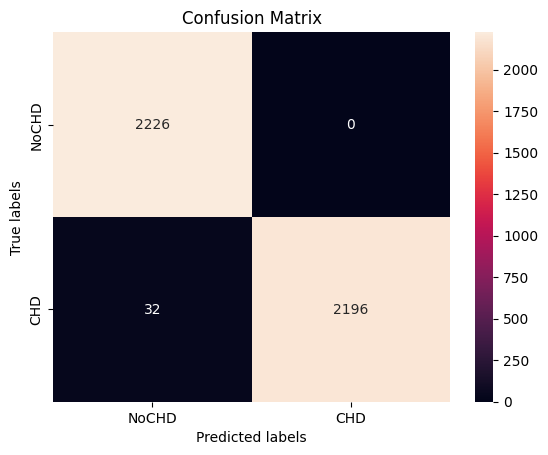

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[525  33]
 [ 81 475]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

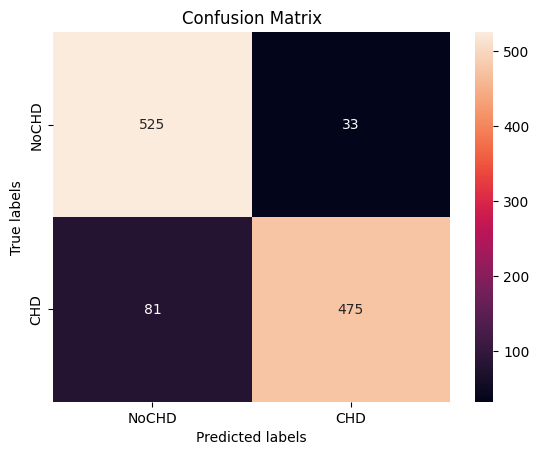

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2226
           1       1.00      0.99      0.99      2228

    accuracy                           0.99      4454
   macro avg       0.99      0.99      0.99      4454
weighted avg       0.99      0.99      0.99      4454


roc-auc score
0.9928186714542191


In [ ]:
print(metrics.classification_report(y_test, test_class_preds))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test, test_class_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       558
           1       0.94      0.85      0.89       556

    accuracy                           0.90      1114
   macro avg       0.90      0.90      0.90      1114
weighted avg       0.90      0.90      0.90      1114


roc-auc score
0.8975883809081767


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

param_dict = {
    'n-estimators': [50,80,100],
    'max-depth': [4,6,8],
    'min_samples_split': [50,100,150],
    'min_samples_leaf': [40,50]
}
# Fit the Algorithm
xg_model = XGBClassifier()

# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=0, scoring='roc_auc')

xg_grid1=xg_grid.fit(X_train,y_train)
# Predict on the model
# Making predictions on train and test data

train_class_preds = xg_grid1.predict(X_train)
test_class_preds = xg_grid1.predict(X_test)

[16:22:55] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:22:59] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:23:04] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:23:04] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:23:05] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:23:05] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not used.

[16:23:06] WARNING: ../src/learner.cc:767: 
Parameters: { "max-depth", "min_samples_leaf", "min_samples_split", "n-estimators" } are not

In [ ]:
print("Best: %f using %s" % (xg_grid.best_score_, xg_grid.best_params_))

Best: 0.947211 using {'max-depth': 4, 'min_samples_leaf': 40, 'min_samples_split': 50, 'n-estimators': 50}


[[2226    0]
 [  32 2196]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

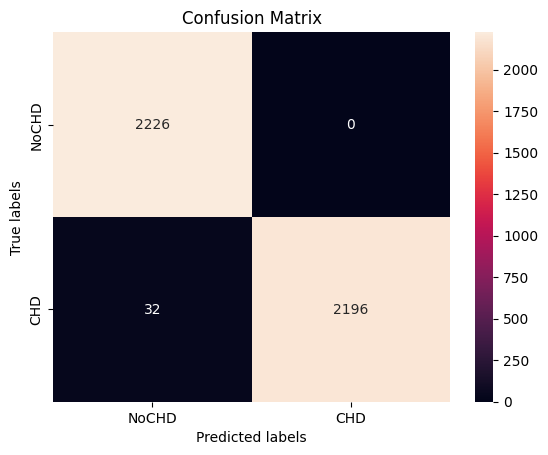

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[525  33]
 [ 81 475]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

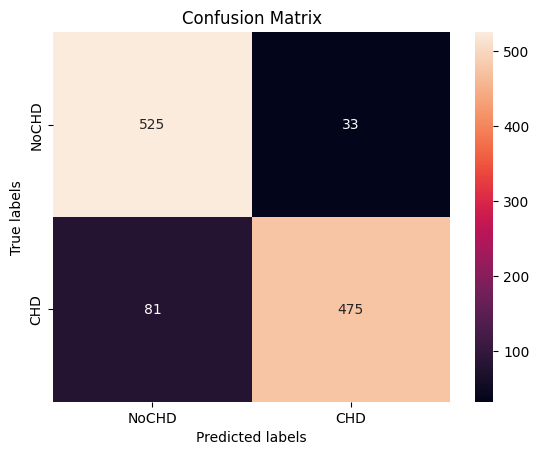

In [ ]:
# Visualizing evaluation Metric Score chart
# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2226
           1       1.00      0.99      0.99      2228

    accuracy                           0.99      4454
   macro avg       0.99      0.99      0.99      4454
weighted avg       0.99      0.99      0.99      4454


roc-auc score
0.9928186714542191


In [ ]:
print(metrics.classification_report(y_test,test_class_preds))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       558
           1       0.94      0.85      0.89       556

    accuracy                           0.90      1114
   macro avg       0.90      0.90      0.90      1114
weighted avg       0.90      0.90      0.90      1114


roc-auc score
0.8975883809081767


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization of an XGBoost classifier, I used the `GridSearchCV` method. This method performs an exhaustive search over a specified parameter grid to find the best hyperparameters for the model. In this case, I specified a grid of hyperparameters to search over, including the `n-estimators`, `max-depth`, `min_samples_split`, and `min_samples_leaf` values. I also used a 5-fold cross-validation strategy. The `GridSearchCV` method evaluated the performance of the model using the `roc_auc` score as the evaluation metric.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


NO there is no improvement in the model’s performance after cross-validation and hyperparameter tuning.

***Scores:***


Before cross-validation and hyperparameter tuning, the model had an accuracy of 0.90 and a ROC AUC score of 0.8976. The precision, recall, and F1-score for class 0 were 0.87, 0.94, and 0.90 respectively. The precision, recall, and F1-score for class 1 were 0.94, 0.85, and 0.89 respectively.

After cross-validation and hyperparameter tuning, the model had the same accuracy of 0.90 and a ROC AUC score of 0.8976. The precision, recall, and F1-score for class 0 were also the same at 0.87, 0.94, and 0.90 respectively. The precision, recall, and F1-score for class 1 were also the same at 0.94, 0.85, and 0.89 respectively.


### ML Model - 4. SVM

In [ ]:
from sklearn.svm import SVC

# Create an instance 
svc = SVC()

# Fit the model
svc.fit(X_train, y_train)

# Make predictions on the training and test datasets
train_class_preds_sv = svc.predict(X_train)
test_class_preds_sv = svc.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train,train_class_preds_sv)
test_acc = accuracy_score(y_test, test_class_preds_sv)

In [ ]:
print(f'Training data accuracy: {train_acc}')
print(f'Testing data accuracy: {test_acc}')

Training data accuracy: 0.7126178715761113
Testing data accuracy: 0.699281867145422


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1466  760]
 [ 520 1708]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

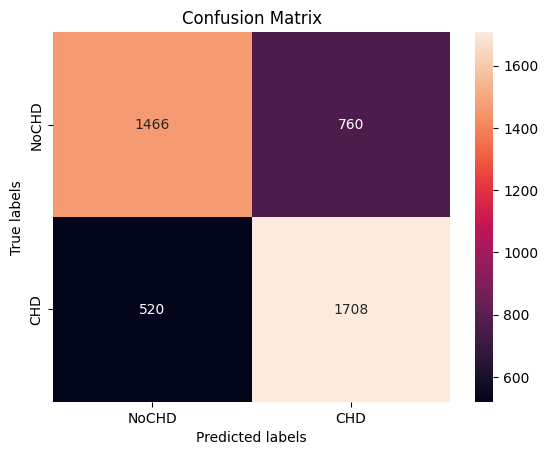

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds_sv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[357 201]
 [134 422]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

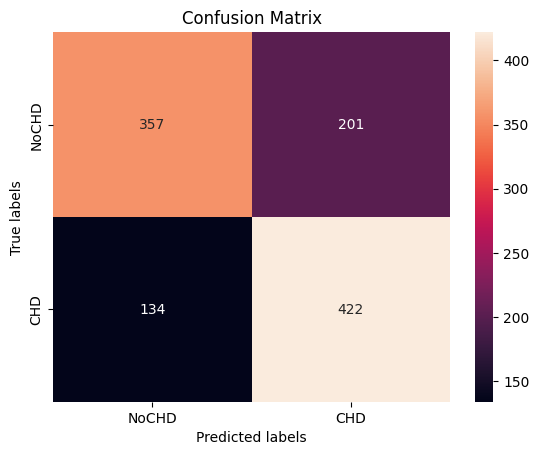

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds_sv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds_sv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_class_preds_sv))

              precision    recall  f1-score   support

           0       0.74      0.66      0.70      2226
           1       0.69      0.77      0.73      2228

    accuracy                           0.71      4454
   macro avg       0.72      0.71      0.71      4454
weighted avg       0.72      0.71      0.71      4454


roc-auc score
0.7125936177797565


In [ ]:
print(metrics.classification_report(y_test,test_class_preds_sv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test,test_class_preds_sv))

              precision    recall  f1-score   support

           0       0.73      0.64      0.68       558
           1       0.68      0.76      0.72       556

    accuracy                           0.70      1114
   macro avg       0.70      0.70      0.70      1114
weighted avg       0.70      0.70      0.70      1114


roc-auc score
0.6993888759959774


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'poly'], 'gamma': ['scale', 'auto']}

# Create an instance of the SVC class
svc = SVC()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(svc, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the training and test datasets
train_class_preds_sv_cv = grid_search.predict(X_train)
test_class_preds_sv_cv = grid_search.predict(X_test)

In [ ]:
train_acc_cv = accuracy_score(y_train,train_class_preds_sv_cv)
test_acc_cv = accuracy_score(y_test,test_class_preds_sv_cv)

In [ ]:
print(f'Train score after cv and hyperparameter tuning: {train_acc_cv}')
print(f'Test score after cv and hyperparameter tuning: {test_acc_cv}')

Train score after cv and hyperparameter tuning: 0.721823080377189
Test score after cv and hyperparameter tuning: 0.7001795332136446


[[1572  654]
 [ 585 1643]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

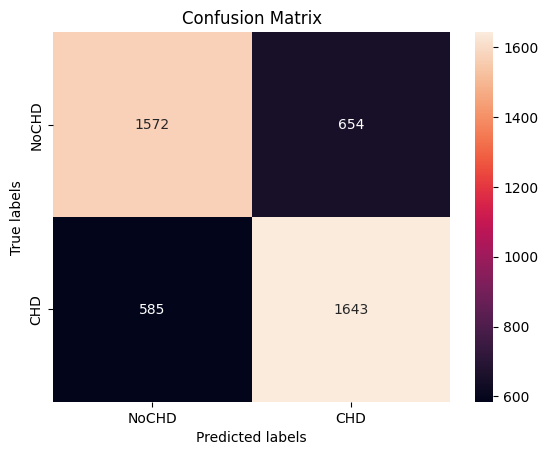

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_class_preds_sv_cv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[385 173]
 [161 395]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

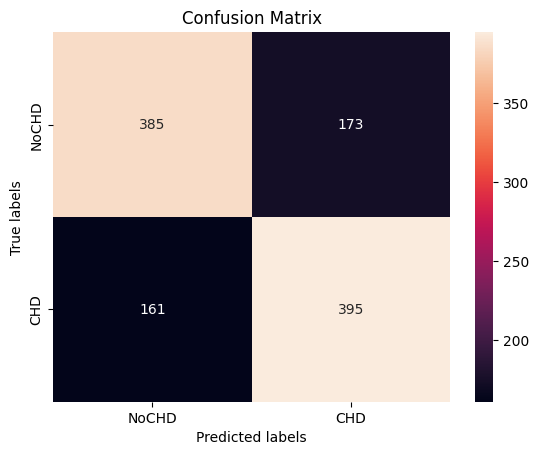

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_class_preds_sv_cv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_class_preds_sv_cv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_class_preds_sv_cv))

              precision    recall  f1-score   support

           0       0.73      0.71      0.72      2226
           1       0.72      0.74      0.73      2228

    accuracy                           0.72      4454
   macro avg       0.72      0.72      0.72      4454
weighted avg       0.72      0.72      0.72      4454


roc-auc score
0.7218160679806627


In [ ]:
print(metrics.classification_report(y_test,test_class_preds_sv_cv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test,test_class_preds_sv_cv))

              precision    recall  f1-score   support

           0       0.71      0.69      0.70       558
           1       0.70      0.71      0.70       556

    accuracy                           0.70      1114
   macro avg       0.70      0.70      0.70      1114
weighted avg       0.70      0.70      0.70      1114


roc-auc score
0.7001979061911762


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization of a support vector classifier, I used the `GridSearchCV` method. This method performs an exhaustive search over a specified parameter grid to find the best hyperparameters for the model. In this case, I specified a grid of hyperparameters to search over, including the `C`, `kernel`, and `gamma` values. I also used a 5-fold cross-validation strategy. The `GridSearchCV` method evaluated the performance of the model to find the best combination of hyperparameters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes there was a slight improvement in the model's performance after cross-validation and hyperparameter tuning.

***Scores:***

Before cross-validation and hyperparameter tuning, the model had an accuracy of 0.70 and a ROC AUC score of 0.6994. The precision, recall, and F1-score for class 0 were 0.73, 0.64, and 0.68 respectively. The precision, recall, and F1-score for class 1 were 0.68, 0.76, and 0.72 respectively.

After cross-validation and hyperparameter tuning, the model had the same accuracy of 0.70 but a slightly higher ROC AUC score of 0.7002. The precision, recall, and F1-score for class 0 were 0.71, 0.69, and 0.70 respectively. The precision, recall, and F1-score for class 1 were also the same at 0.70, 0.71, and 0.70 respectively.




### ML Model - 5. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the GaussianNB class
gnb = GaussianNB()

# Fit the model on the training data
gnb.fit(X_train, y_train)

# Make predictions on the training and test datasets
train_pred_nb = gnb.predict(X_train)
test_pred_nb = gnb.predict(X_test)

In [ ]:
train_acc_score = accuracy_score(y_train, train_pred_nb)
test_acc_score = accuracy_score(y_test, test_pred_nb)

In [ ]:
print(f'Train accuracy for naive bayes: {train_acc_score}')
print(f'Test accuracy for naive bayes: {test_acc_score}')

Train accuracy for naive bayes: 0.6414458913336327
Test accuracy for naive bayes: 0.625673249551167


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

[[1638  588]
 [1009 1219]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

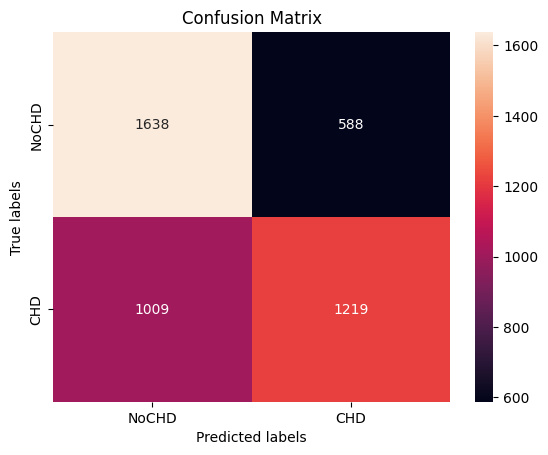

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_pred_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[408 150]
 [267 289]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

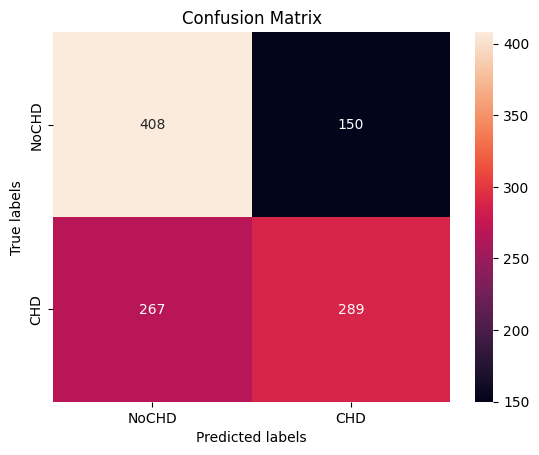

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_pred_nb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_pred_nb))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_pred_nb))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2226
           1       0.67      0.55      0.60      2228

    accuracy                           0.64      4454
   macro avg       0.65      0.64      0.64      4454
weighted avg       0.65      0.64      0.64      4454


roc-auc score
0.6414882625927306


In [ ]:
print(metrics.classification_report(y_test,test_pred_nb))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test,test_pred_nb))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       558
           1       0.66      0.52      0.58       556

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.62      1114
weighted avg       0.63      0.63      0.62      1114


roc-auc score
0.6254834841803977


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7]}

# Create an instance of the GaussianNB class
gnb = GaussianNB()

# Create an instance of the GridSearchCV class
grid_search = GridSearchCV(gnb, param_grid, cv=5)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Make predictions on the training and test datasets
train_pred_nb_cv = grid_search.predict(X_train)
test_pred_nb_cv = grid_search.predict(X_test)

In [ ]:
print(f'The best parameters are: {best_params}')

The best parameters are: {'var_smoothing': 1e-09}


In [ ]:
train_acc_score_cv = accuracy_score(y_train, train_pred_nb_cv)
test_acc_score_cv = accuracy_score(y_test, test_pred_nb_cv)

In [ ]:
print(f'Train accuracy for naive bayes after cv and hyperparameter tuning: {train_acc_score_cv}')
print(f'Test accuracy for naive bayes after cv and hyperparameter tuning: {test_acc_score_cv}')

Train accuracy for naive bayes after cv and hyperparameter tuning: 0.6414458913336327
Test accuracy for naive bayes after cv and hyperparameter tuning: 0.625673249551167


[[1638  588]
 [1009 1219]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

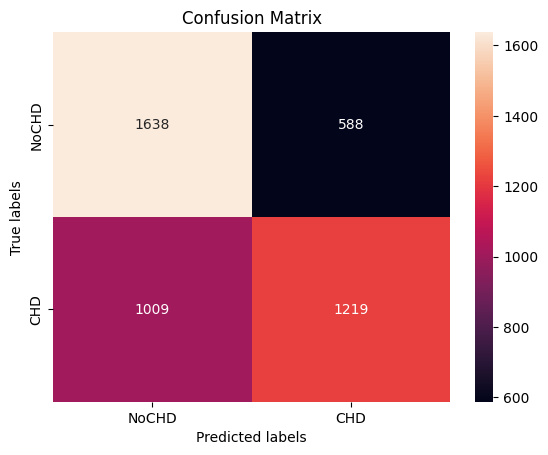

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_train, train_pred_nb_cv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[408 150]
 [267 289]]


[Text(0, 0.5, 'NoCHD'), Text(0, 1.5, 'CHD')]

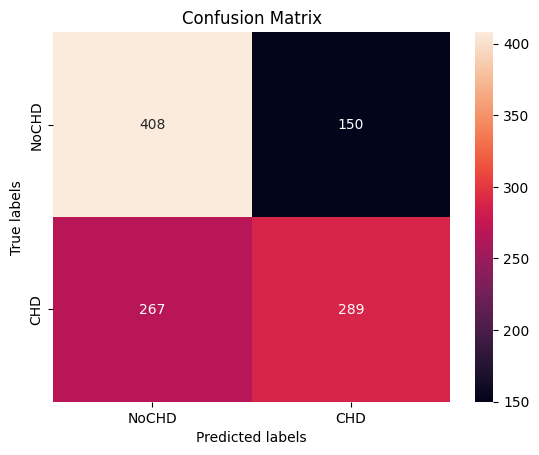

In [ ]:
# Visualizing evaluation Metric Score chart

# Visualizing evaluation Metric Score chart# Get the confusion matrix for both train and test

labels = ['NoCHD', 'CHD']
cm = confusion_matrix(y_test, test_pred_nb_cv)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt='d') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
print(metrics.classification_report(y_train,train_pred_nb_cv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_train,train_pred_nb_cv))

              precision    recall  f1-score   support

           0       0.62      0.74      0.67      2226
           1       0.67      0.55      0.60      2228

    accuracy                           0.64      4454
   macro avg       0.65      0.64      0.64      4454
weighted avg       0.65      0.64      0.64      4454


roc-auc score
0.6414882625927306


In [ ]:
print(metrics.classification_report(y_test,test_pred_nb_cv))
print('')
print('roc-auc score')
print(metrics.roc_auc_score(y_test,test_pred_nb_cv))

              precision    recall  f1-score   support

           0       0.60      0.73      0.66       558
           1       0.66      0.52      0.58       556

    accuracy                           0.63      1114
   macro avg       0.63      0.63      0.62      1114
weighted avg       0.63      0.63      0.62      1114


roc-auc score
0.6254834841803977


##### Which hyperparameter optimization technique have you used and why?

For hyperparameter optimization of a Gaussian Naive Bayes classifier, I used the `GridSearchCV` method. This method performs an exhaustive search over a specified parameter grid to find the best hyperparameters for the model. In this case, I specified a grid of hyperparameters to search over, including the `var_smoothing` value. I also used a 5-fold cross-validation strategy. The `GridSearchCV` method evaluated the performance of the model to find the best combination of hyperparameters.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO there was no improvement in the model's performance after cross-validation and hyperparameter tuning.

***Scores:***

Before cross-validation and hyperparameter tuning, the model had an accuracy of 0.63 and a ROC AUC score of 0.6255. The precision, recall, and F1-score for class 0 were 0.60, 0.73, and 0.66 respectively. The precision, recall, and F1-score for class 1 were 0.66, 0.52, and 0.58 respectively.

After cross-validation and hyperparameter tuning, the model had the same accuracy of 0.63 and a ROC AUC score of 0.6255. The precision, recall, and F1-score for class 0 were also the same at 0.60, 0.73, and 0.66 respectively. The precision, recall, and F1-score for class 1 were also the same at 0.66, 0.52, and 0.58 respectively.


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered several evaluation metrics to assess the performance of your model and its potential positive business impact. These metrics include accuracy, precision, recall, F1-score, and ROC AUC score.

***1. Accuracy:***

  Accuracy measures the overall correctness of the model's predictions. It is calculated as the ratio of correct predictions to the total number of predictions. A high accuracy indicates that the model is making correct predictions for a large proportion of the data.

***2. Precision:***

  Precision measures the proportion of true positive predictions among all positive predictions. In other words, it measures how many of the positive predictions made by the model are actually correct. A high precision indicates that the model is making few false positive predictions.

***3. Recall:***

   Recall measures the proportion of true positive predictions among all actual positive instances. In other words, it measures how many of the actual positive instances were correctly identified by the model. A high recall indicates that the model is making few false negative predictions.

***4. F1-score:***

  The F1-score is a measure that combines precision and recall to provide a single number that represents the balance between these two metrics. It is calculated as the harmonic mean of precision and recall. A high F1-score indicates that the model has a good balance between precision and recall.

***5. ROC AUC score:***

   The ROC AUC score measures the ability of the model to distinguish between the two classes. It is calculated as the area under the receiver operating characteristic (ROC) curve, which plots the true positive rate against the false positive rate at different classification thresholds. A high ROC AUC score indicates that the model is able to effectively distinguish between the two classes.

The choice of which evaluation metric to use depends on the specific business problem and the goals of the model. For example, if the cost of false positives is high, then precision may be an important metric to consider. If the cost of false negatives is high, then recall may be more important. In some cases, a balance between precision and recall may be desired, in which case the F1-score could be a useful metric.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From above model evaluations I choose Random Forest clasifier as my final prediction model. I choose it because it gave a 100% roc-auc score for training data and a very high score of 90% roc-auc score for the test data.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 kB 10.0 MB/s eta 0:00:00


What is SHAP?

SHAP (SHapley Additive exPlanations) is a method for explaining the output of machine learning models. It assigns an importance value to each feature in the input data, indicating how much that feature contributes to the model's prediction for a particular instance. These importance values are called SHAP values and they are calculated using a game theoretic approach based on the concept of Shapley values from cooperative game theory.

The `shap` library is a Python package that implements the SHAP method and provides various tools for visualizing and interpreting SHAP values. It supports many different types of machine learning models and can be used to explain both classification and regression models.

In summary, SHAP is a method for explaining machine learning models by assigning importance values to input features, and the `shap` library is a Python package that implements this method and provides tools for working with SHAP values.


In [ ]:

import shap
#Get shap values
explainer = shap.Explainer(rf_models)
shap_values_rfc = explainer(X_test) 

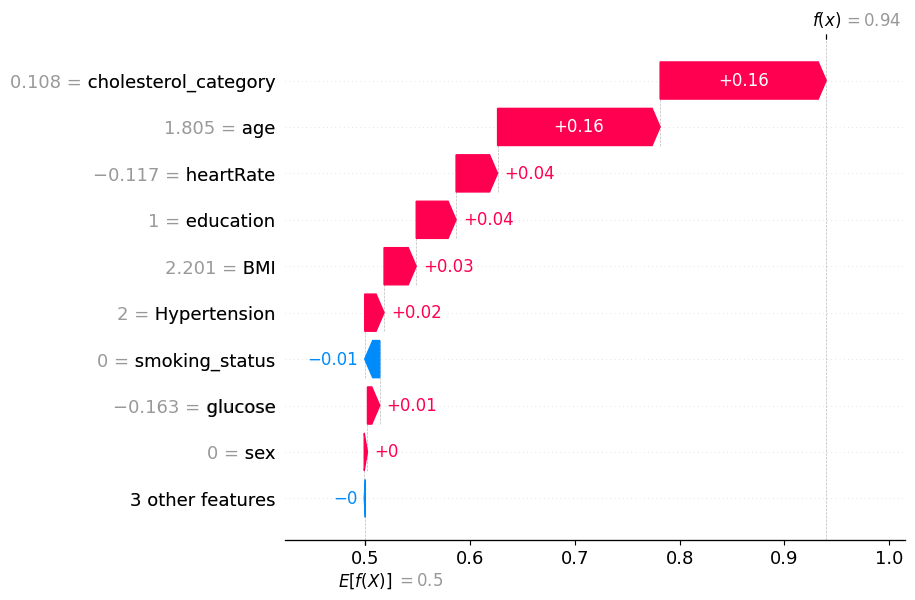

In [ ]:
# Select SHAP values for first observation and first class
shap_values_rfc_class1 = shap_values_rfc[0,:,1]

# # Generate waterfall plot for first observation and first class
shap.plots.waterfall(shap_values_rfc_class1)
# shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()

# Generate force plot for first observation and second class
shap.plots.force(shap_values_rfc_class1)

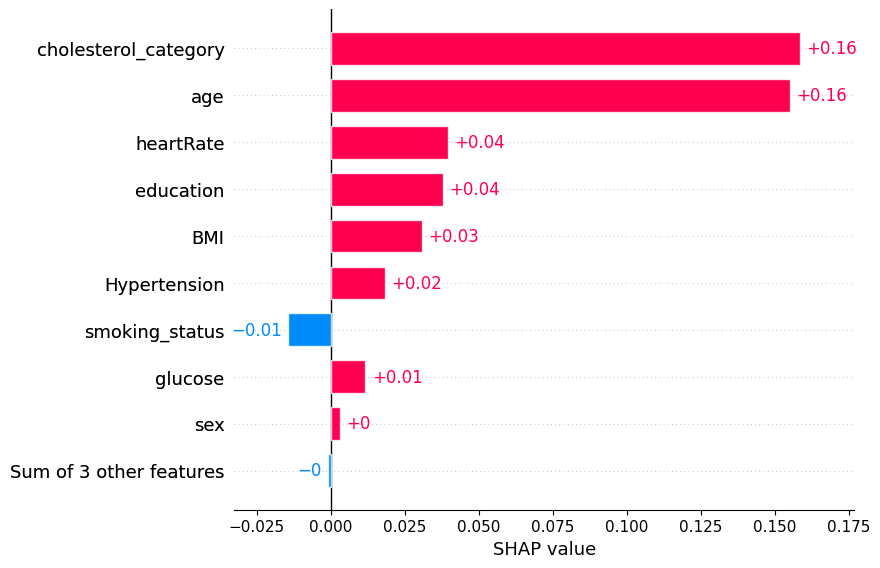

In [ ]:
#Mean SHAP
shap.plots.bar(shap_values_rfc_class1)

From above plots it is seen that cholestrol_category is the most important feature.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Overall conclusions from the whole project:

1. Heart disease is present in a significant number of individuals in the dataset.
2. Smoking is associated with an increased risk of heart disease.
3. Males have a higher risk of heart disease than females.
4. Certain medical conditions such as hypertension, stroke, diabetes, and the use of blood pressure medication are associated with an increased risk of heart disease.
5. The risk of heart disease increases with age, with the highest risk observed among people in Late Adulthood.
6. Heart rate does not appear to have a significant impact on the risk of heart disease.
7. High cholesterol levels are associated with an increased risk of heart disease.
8. The majority of people in the dataset do not have heart disease, regardless of their age, heart rate, or cholesterol levels.
9. Early Adulthood appears to be a low-risk age group for heart disease.
10. Finally, Random Forest Classifier is proven with the highet accuracy, f1-score and ruc-aoc score with 90% on test data.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***